# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:51:00.689243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:51:04.050201
2025-04-14 18:51:04.050201


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:50:58"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

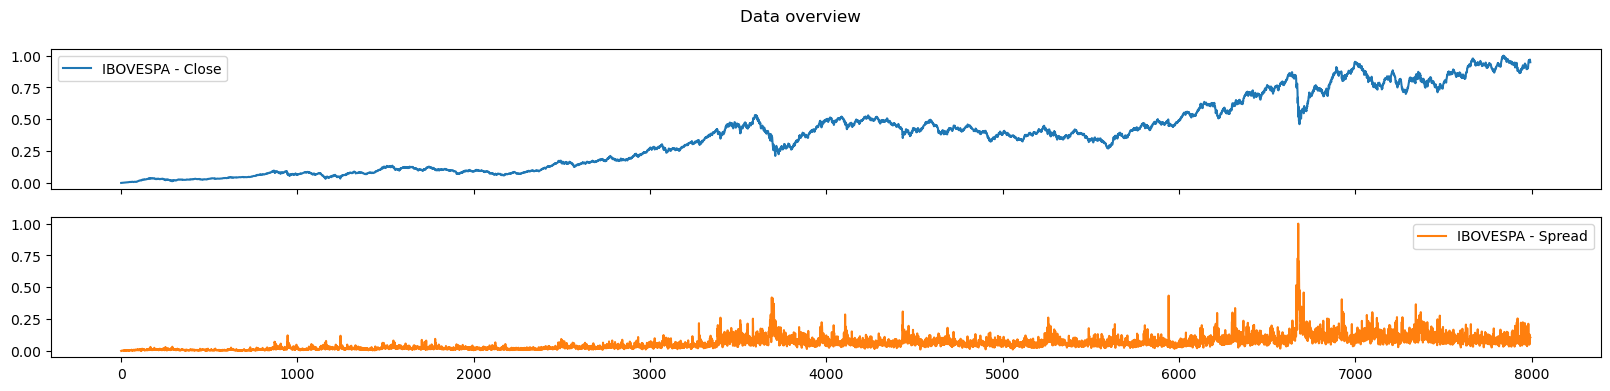

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

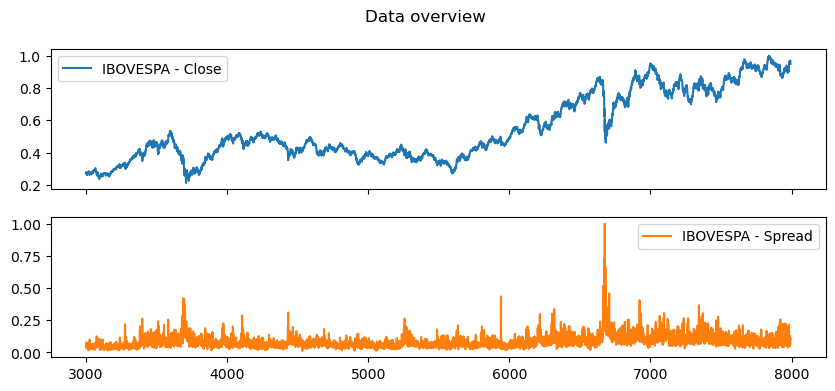

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

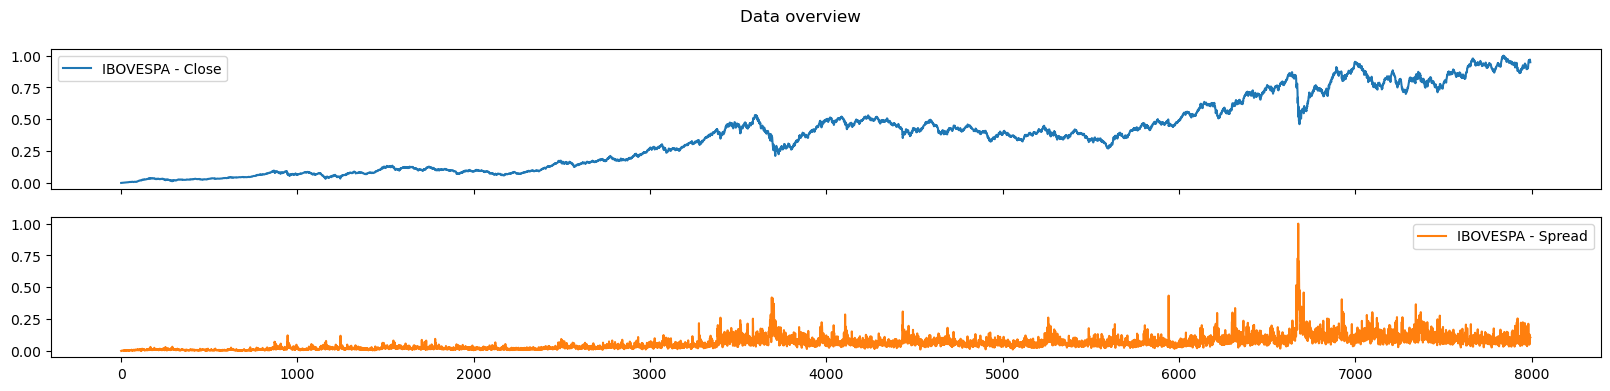

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

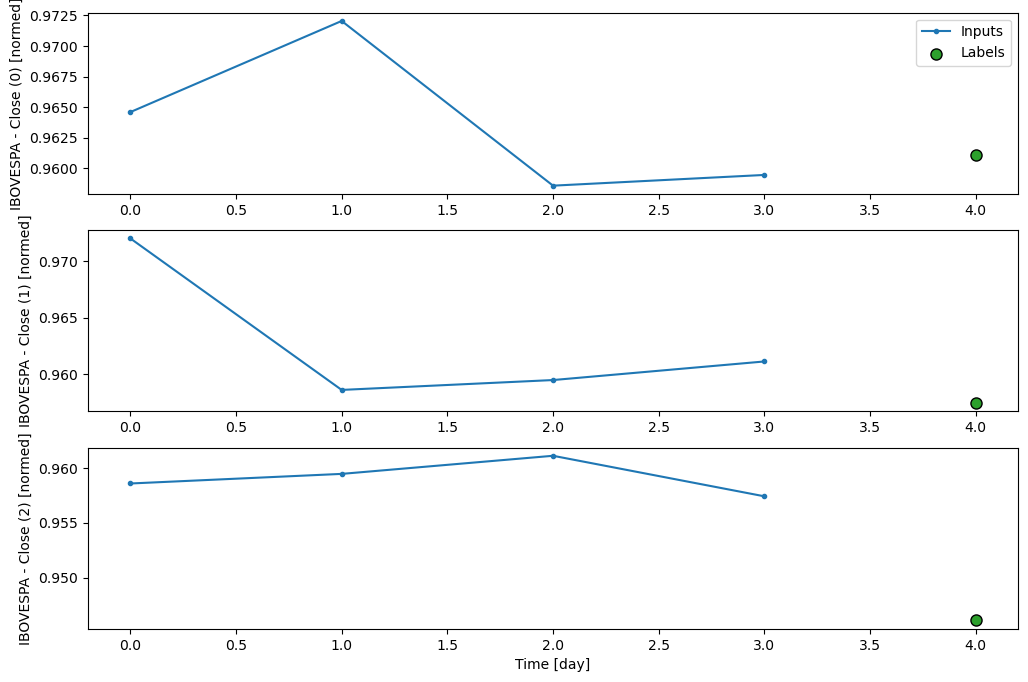

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11:21 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 56.3920 - mean_squared_error: 3.0006e-05 - root_mean_squared_error: 0.0052   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.9707 - mean_squared_error: 3.8880e-05 - root_mean_squared_error: 0.0061

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.7057 - mean_squared_error: 3.9967e-05 - root_mean_squared_error: 0.0062

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 36.4021 - mean_squared_error: 4.1820e-05 - root_mean_squared_error: 0.0064

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 33.6562 - mean_squared_error: 5.3992e-05 - root_mean_squared_error: 0.0071

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 31.7386 - mean_squared_error: 6.6167e-05 - root_mean_squared_error: 0.0078

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 30.1418 - mean_squared_error: 8.2413e-05 - root_mean_squared_error: 0.0086

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 28.7797 - mean_squared_error: 9.6316e-05 - root_mean_squared_error: 0.0093

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.6026 - mean_squared_error: 1.0649e-04 - root_mean_squared_error: 0.0098

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 26.6746 - mean_squared_error: 1.1551e-04 - root_mean_squared_error: 0.0102

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 26.1022 - mean_squared_error: 1.3557e-04 - root_mean_squared_error: 0.0109

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 25.5463 - mean_squared_error: 1.6263e-04 - root_mean_squared_error: 0.0118

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.0547 - mean_squared_error: 1.8150e-04 - root_mean_squared_error: 0.0125

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 24.5089 - mean_squared_error: 2.0120e-04 - root_mean_squared_error: 0.0131

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 24.0469 - mean_squared_error: 2.1823e-04 - root_mean_squared_error: 0.0137

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 23.5586 - mean_squared_error: 2.4466e-04 - root_mean_squared_error: 0.0144

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 23.2112 - mean_squared_error: 3.0497e-04 - root_mean_squared_error: 0.0156

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 22.9429 - mean_squared_error: 4.3344e-04 - root_mean_squared_error: 0.0175

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 22.6709 - mean_squared_error: 5.4707e-04 - root_mean_squared_error: 0.0193

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 22.4086 - mean_squared_error: 6.5141e-04 - root_mean_squared_error: 0.0208

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 22.1107 - mean_squared_error: 7.5652e-04 - root_mean_squared_error: 0.0224

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 21.8541 - mean_squared_error: 8.3628e-04 - root_mean_squared_error: 0.0237

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 21.5701 - mean_squared_error: 9.1667e-04 - root_mean_squared_error: 0.0249

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 21.3285 - mean_squared_error: 9.7864e-04 - root_mean_squared_error: 0.0259

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 21.0848 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0271    

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 20.9225 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 20.7604 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 20.5782 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 20.4027 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 20.2134 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 20.0347 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 19.8847 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 19.7817 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0346 - val_loss: 0.1042 - val_mean_absolute_error: 0.1042 - val_mean_absolute_percentage_error: 11.1265 - val_mean_squared_error: 0.0122 - val_root_mean_squared_error: 0.1104


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.6888 - mean_absolute_error: 0.6888 - mean_absolute_percentage_error: 32316.8613 - mean_squared_error: 0.4745 - root_mean_squared_error: 0.6888

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6928 - mean_absolute_error: 0.6928 - mean_absolute_percentage_error: 20878.9551 - mean_squared_error: 0.4800 - root_mean_squared_error: 0.6928 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6649 - mean_absolute_error: 0.6649 - mean_absolute_percentage_error: 13356.7090 - mean_squared_error: 0.4453 - root_mean_squared_error: 0.6667

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6030 - mean_absolute_error: 0.6030 - mean_absolute_percentage_error: 10250.9463 - mean_squared_error: 0.3874 - root_mean_squared_error: 0.6186

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 8422.2627 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5722 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 7201.1875 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5337

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 6319.7886 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.5018

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4094 - mean_absolute_error: 0.4094 - mean_absolute_percentage_error: 5750.3652 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4793

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 5202.0439 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4559

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 4759.1997 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4358

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 4393.1367 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4182

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 4182.0430 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4076

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 3948.0181 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3955

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 3741.6152 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3845

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 3557.9685 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3744

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 3393.3140 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3651

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 3244.7551 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3565

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 3109.9629 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3485

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 2963.7361 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3396

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 2831.9705 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3314

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 2712.5537 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3237

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 2603.7693 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3166

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 2552.9414 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3133

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 2472.9780 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3080

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 2384.0464 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3021

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 2315.1685 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2974

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 2238.1028 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2921

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 2166.5100 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2871

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 2099.7952 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2824

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 2047.5605 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2787

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 1988.5348 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2743

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 1942.1349 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2709

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1675 - mean_absolute_error: 0.1675 - mean_absolute_percentage_error: 1889.5055 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2670

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 1839.9275 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2632

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 1793.1381 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2596

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1770.7142 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2579

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 1727.6713 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2545

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1686.8694 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2513

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 1648.1287 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2482

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 1617.3098 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2458

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 1593.5551 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2439

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 1570.5560 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2420

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 1542.8132 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2398

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 1510.9093 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2372

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1495.4941 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2359


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1470.5652 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2339 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303 - val_mean_absolute_percentage_error: 3.2351 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0350


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:54 3s/step - loss: 0.4380 - mean_absolute_error: 0.4380 - mean_absolute_percentage_error: 20542.4766 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4380

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 10164.4375 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4304

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 8454.9600 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.4216 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4116 - mean_absolute_error: 0.4116 - mean_absolute_percentage_error: 7664.4868 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.4135

 16/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 6499.4292 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3937

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 5200.6982 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3613

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 4578.4722 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3417

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 4279.1396 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3312

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 3867.2102 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3158

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 3535.2900 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.3023

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 3212.2122 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.2882

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 2989.3418 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2779

 57/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 2798.5054 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2687

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 2664.3462 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2620

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 2461.0891 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2514

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 2289.5696 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2421

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 2142.6646 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2337

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 2015.2441 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2262

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 1903.5504 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2194

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 1791.5503 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2124

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 1693.1990 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2060

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 1616.4187 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2009

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1537.5642 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1955 

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 1466.7483 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1906

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 1410.4225 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1865

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 1351.6082 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1823

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1304.3973 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1788

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1254.6931 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1750

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1214.4946 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1719

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1171.8820 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1686

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1137.1986 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1658

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 1104.6954 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1632

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1074.1677 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1607

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 1041.4683 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1580

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 1010.8850 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1554

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 982.2139 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1530 

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 955.2742 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1508


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 936.1158 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1492 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371 - val_mean_absolute_percentage_error: 3.9580 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0399


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 880.3014 - mean_squared_error: 3.5547e-04 - root_mean_squared_error: 0.0189

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 381.3080 - mean_squared_error: 3.9838e-04 - root_mean_squared_error: 0.0198 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 266.4354 - mean_squared_error: 3.7961e-04 - root_mean_squared_error: 0.0194

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 220.7092 - mean_squared_error: 3.8847e-04 - root_mean_squared_error: 0.0196

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 195.2958 - mean_squared_error: 4.0248e-04 - root_mean_squared_error: 0.0200

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 173.4189 - mean_squared_error: 4.0749e-04 - root_mean_squared_error: 0.0201

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 154.9776 - mean_squared_error: 4.0563e-04 - root_mean_squared_error: 0.0201

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 140.6853 - mean_squared_error: 3.9778e-04 - root_mean_squared_error: 0.0199

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 129.2186 - mean_squared_error: 3.8834e-04 - root_mean_squared_error: 0.0197

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 119.8060 - mean_squared_error: 3.7819e-04 - root_mean_squared_error: 0.0194

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 112.8938 - mean_squared_error: 3.6986e-04 - root_mean_squared_error: 0.0192

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 106.0733 - mean_squared_error: 3.6024e-04 - root_mean_squared_error: 0.0189

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 100.8482 - mean_squared_error: 3.5190e-04 - root_mean_squared_error: 0.0187

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.5585 - mean_squared_error: 3.4256e-04 - root_mean_squared_error: 0.0184 

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.4275 - mean_squared_error: 3.3480e-04 - root_mean_squared_error: 0.0182

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.1799 - mean_squared_error: 3.2646e-04 - root_mean_squared_error: 0.0179

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.8252 - mean_squared_error: 3.2047e-04 - root_mean_squared_error: 0.0178

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.3580 - mean_squared_error: 3.1766e-04 - root_mean_squared_error: 0.0177

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.5949 - mean_squared_error: 3.1752e-04 - root_mean_squared_error: 0.0177

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.6958 - mean_squared_error: 3.1734e-04 - root_mean_squared_error: 0.0177

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.3567 - mean_squared_error: 3.1679e-04 - root_mean_squared_error: 0.0177

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.1810 - mean_squared_error: 3.1593e-04 - root_mean_squared_error: 0.0177

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.1516 - mean_squared_error: 3.1482e-04 - root_mean_squared_error: 0.0176

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.2563 - mean_squared_error: 3.1379e-04 - root_mean_squared_error: 0.0176

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.2359 - mean_squared_error: 3.1251e-04 - root_mean_squared_error: 0.0176

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 62.5842 - mean_squared_error: 3.1154e-04 - root_mean_squared_error: 0.0176

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 60.8154 - mean_squared_error: 3.1079e-04 - root_mean_squared_error: 0.0175

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 59.3624 - mean_squared_error: 3.1068e-04 - root_mean_squared_error: 0.0175

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 57.7971 - mean_squared_error: 3.1056e-04 - root_mean_squared_error: 0.0175

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 56.5074 - mean_squared_error: 3.1230e-04 - root_mean_squared_error: 0.0176

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 55.1181 - mean_squared_error: 3.1821e-04 - root_mean_squared_error: 0.0177

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 53.9699 - mean_squared_error: 3.2572e-04 - root_mean_squared_error: 0.0179


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 52.7271 - mean_squared_error: 3.3546e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1773 - val_mean_squared_error: 1.9175e-04 - val_root_mean_squared_error: 0.0138


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 6841.5020 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1458

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 2875.6199 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1243 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 1964.1350 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1057

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 1573.5892 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0955

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 1298.1853 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0873

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 1132.9550 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0817

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 993.8739 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0766 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 912.2183 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0733

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 824.0413 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0696

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 769.4146 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0672

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 722.2976 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0650

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 674.8408 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 628.4279 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 593.2531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 566.3977 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 545.9930 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 534.5135 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 520.0147 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 503.0736 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0536

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 478.3780 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 458.8741 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 438.6312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 422.4682 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0490

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 405.5322 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 391.8942 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 377.4967 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 364.2206 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0454

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 353.4204 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 341.9120 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 332.5012 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0434

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 322.4202 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 314.1383 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 305.2331 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 297.8881 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 289.9600 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244 - val_mean_absolute_percentage_error: 2.5982 - val_mean_squared_error: 7.2273e-04 - val_root_mean_squared_error: 0.0269


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 5549.4316 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1182

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 2324.9214 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0999 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 1646.2290 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0860

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 1268.3453 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0762

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 1045.7487 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0696

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 912.2800 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0652 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 799.8964 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 724.1313 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 654.9748 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 605.4623 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 558.1580 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 523.0127 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 492.4518 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 469.2427 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 441.8275 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 417.7439 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 398.9430 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 381.9461 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 366.4950 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 350.4514 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 337.6396 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 324.2102 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 313.3922 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 301.9696 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 292.7078 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 282.8779 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 274.8602 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 266.2926 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 259.2678 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 251.7288 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 245.5231 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 239.6501 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 233.3097 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.4028 - val_mean_squared_error: 2.5524e-04 - val_root_mean_squared_error: 0.0160


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 9118.6279 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1944

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 3909.2976 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1785 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 2800.3462 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1590

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 2172.7241 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1430

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 1835.9509 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1324

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1570.3704 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1228

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1399.7892 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1160

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 1249.2052 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1095

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 1144.1644 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1046

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 1045.8208 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0998

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 973.9620 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0961 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 920.5524 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0933

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 858.6815 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 811.6290 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0872

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 764.3825 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0845

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 727.7598 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0822

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 690.3817 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0799

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 660.9880 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0781

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 634.2303 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0763

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 609.7573 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0747

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 584.2172 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 563.7256 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0716

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 547.3799 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0705

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 529.5805 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0692

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 513.0096 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0680

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 495.4136 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0667

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 481.0691 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0657

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 465.7524 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0645

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 453.2023 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0636

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 439.7400 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0625

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 428.6624 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0617

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 416.7303 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0608

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 406.8723 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0600


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 402.8057 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0597 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_absolute_percentage_error: 2.6883 - val_mean_squared_error: 7.3030e-04 - val_root_mean_squared_error: 0.0270


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 864.5168 - mean_squared_error: 3.3874e-04 - root_mean_squared_error: 0.0184

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 320.8480 - mean_squared_error: 1.7324e-04 - root_mean_squared_error: 0.0130 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 225.8958 - mean_squared_error: 1.3741e-04 - root_mean_squared_error: 0.0115

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 173.9346 - mean_squared_error: 1.1445e-04 - root_mean_squared_error: 0.0104

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 143.5640 - mean_squared_error: 1.0008e-04 - root_mean_squared_error: 0.0097

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 123.3920 - mean_squared_error: 9.1230e-05 - root_mean_squared_error: 0.0092

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 110.7682 - mean_squared_error: 8.9460e-05 - root_mean_squared_error: 0.0092

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 99.6442 - mean_squared_error: 8.8744e-05 - root_mean_squared_error: 0.0092 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.8905 - mean_squared_error: 8.8376e-05 - root_mean_squared_error: 0.0092

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 85.4711 - mean_squared_error: 8.7994e-05 - root_mean_squared_error: 0.0092

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 79.3098 - mean_squared_error: 8.6968e-05 - root_mean_squared_error: 0.0092

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 74.7013 - mean_squared_error: 8.5865e-05 - root_mean_squared_error: 0.0091

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 70.6799 - mean_squared_error: 8.4883e-05 - root_mean_squared_error: 0.0091

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.1435 - mean_squared_error: 8.4698e-05 - root_mean_squared_error: 0.0091

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 63.5879 - mean_squared_error: 8.5784e-05 - root_mean_squared_error: 0.0091

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 60.8204 - mean_squared_error: 8.7458e-05 - root_mean_squared_error: 0.0092

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 57.9872 - mean_squared_error: 9.0168e-05 - root_mean_squared_error: 0.0094

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 55.7636 - mean_squared_error: 9.5041e-05 - root_mean_squared_error: 0.0096

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 53.4612 - mean_squared_error: 1.0171e-04 - root_mean_squared_error: 0.0099

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 51.6220 - mean_squared_error: 1.0704e-04 - root_mean_squared_error: 0.0101

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 49.6909 - mean_squared_error: 1.1223e-04 - root_mean_squared_error: 0.0103

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 48.1316 - mean_squared_error: 1.1598e-04 - root_mean_squared_error: 0.0105

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 46.4813 - mean_squared_error: 1.1953e-04 - root_mean_squared_error: 0.0106

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 45.3265 - mean_squared_error: 1.2177e-04 - root_mean_squared_error: 0.0107

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.2357 - mean_squared_error: 1.2370e-04 - root_mean_squared_error: 0.0108

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.8714 - mean_squared_error: 1.2585e-04 - root_mean_squared_error: 0.0109

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.7538 - mean_squared_error: 1.2739e-04 - root_mean_squared_error: 0.0110

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.5553 - mean_squared_error: 1.2887e-04 - root_mean_squared_error: 0.0111

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.5693 - mean_squared_error: 1.2999e-04 - root_mean_squared_error: 0.0111

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.5090 - mean_squared_error: 1.3160e-04 - root_mean_squared_error: 0.0112

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.6341 - mean_squared_error: 1.3316e-04 - root_mean_squared_error: 0.0113

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.6890 - mean_squared_error: 1.3495e-04 - root_mean_squared_error: 0.0114


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.7974 - mean_squared_error: 1.3665e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7937 - val_mean_squared_error: 8.8374e-05 - val_root_mean_squared_error: 0.0094


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 893.4232 - mean_squared_error: 3.6283e-04 - root_mean_squared_error: 0.0190

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 343.9156 - mean_squared_error: 2.5444e-04 - root_mean_squared_error: 0.0159 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 246.8024 - mean_squared_error: 2.2613e-04 - root_mean_squared_error: 0.0149

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 191.3208 - mean_squared_error: 1.9245e-04 - root_mean_squared_error: 0.0137

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 161.5754 - mean_squared_error: 1.7005e-04 - root_mean_squared_error: 0.0128

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 138.1959 - mean_squared_error: 1.5060e-04 - root_mean_squared_error: 0.0119

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 123.2184 - mean_squared_error: 1.3727e-04 - root_mean_squared_error: 0.0113

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 111.4928 - mean_squared_error: 1.2641e-04 - root_mean_squared_error: 0.0108

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 102.0362 - mean_squared_error: 1.1740e-04 - root_mean_squared_error: 0.0104

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 94.2273 - mean_squared_error: 1.0975e-04 - root_mean_squared_error: 0.0100 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 87.6579 - mean_squared_error: 1.0317e-04 - root_mean_squared_error: 0.0096

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 81.3092 - mean_squared_error: 9.6724e-05 - root_mean_squared_error: 0.0093

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 76.5492 - mean_squared_error: 9.1896e-05 - root_mean_squared_error: 0.0090

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.3781 - mean_squared_error: 8.7673e-05 - root_mean_squared_error: 0.0088

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 68.6882 - mean_squared_error: 8.3964e-05 - root_mean_squared_error: 0.0086

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 64.9565 - mean_squared_error: 8.0328e-05 - root_mean_squared_error: 0.0084

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.6567 - mean_squared_error: 7.7492e-05 - root_mean_squared_error: 0.0082

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.0661 - mean_squared_error: 7.5456e-05 - root_mean_squared_error: 0.0081

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.3889 - mean_squared_error: 7.3399e-05 - root_mean_squared_error: 0.0080

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 54.2598 - mean_squared_error: 7.1774e-05 - root_mean_squared_error: 0.0079

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.3039 - mean_squared_error: 7.0308e-05 - root_mean_squared_error: 0.0079

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 50.5000 - mean_squared_error: 6.8952e-05 - root_mean_squared_error: 0.0078

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.6018 - mean_squared_error: 6.7507e-05 - root_mean_squared_error: 0.0077

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.0680 - mean_squared_error: 6.6364e-05 - root_mean_squared_error: 0.0077

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.4436 - mean_squared_error: 6.5166e-05 - root_mean_squared_error: 0.0076

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.1223 - mean_squared_error: 6.4206e-05 - root_mean_squared_error: 0.0076

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.7141 - mean_squared_error: 6.3198e-05 - root_mean_squared_error: 0.0075

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 41.4033 - mean_squared_error: 6.2329e-05 - root_mean_squared_error: 0.0075

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.3286 - mean_squared_error: 6.1718e-05 - root_mean_squared_error: 0.0074

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.5998 - mean_squared_error: 6.1734e-05 - root_mean_squared_error: 0.0074

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 38.6292 - mean_squared_error: 6.2213e-05 - root_mean_squared_error: 0.0075

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 37.7114 - mean_squared_error: 6.2918e-05 - root_mean_squared_error: 0.0075

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 36.7218 - mean_squared_error: 6.3913e-05 - root_mean_squared_error: 0.0076


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 36.2489 - mean_squared_error: 6.4401e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9531 - val_mean_squared_error: 1.2318e-04 - val_root_mean_squared_error: 0.0111


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 768.3225 - mean_squared_error: 2.6876e-04 - root_mean_squared_error: 0.0164

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 291.7245 - mean_squared_error: 1.7718e-04 - root_mean_squared_error: 0.0132 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 212.3199 - mean_squared_error: 1.7413e-04 - root_mean_squared_error: 0.0132

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 169.1862 - mean_squared_error: 1.7396e-04 - root_mean_squared_error: 0.0132

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 145.5951 - mean_squared_error: 1.6919e-04 - root_mean_squared_error: 0.0130

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 126.4821 - mean_squared_error: 1.6060e-04 - root_mean_squared_error: 0.0126

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 113.9502 - mean_squared_error: 1.5259e-04 - root_mean_squared_error: 0.0123

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 102.7352 - mean_squared_error: 1.4421e-04 - root_mean_squared_error: 0.0119

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 94.8058 - mean_squared_error: 1.3746e-04 - root_mean_squared_error: 0.0116 

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 87.3027 - mean_squared_error: 1.3039e-04 - root_mean_squared_error: 0.0113

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 81.0500 - mean_squared_error: 1.2401e-04 - root_mean_squared_error: 0.0110

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 76.3589 - mean_squared_error: 1.1896e-04 - root_mean_squared_error: 0.0107

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 72.2466 - mean_squared_error: 1.1435e-04 - root_mean_squared_error: 0.0105

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 68.1225 - mean_squared_error: 1.0961e-04 - root_mean_squared_error: 0.0102

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 64.9278 - mean_squared_error: 1.0587e-04 - root_mean_squared_error: 0.0100

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 63.2508 - mean_squared_error: 1.0394e-04 - root_mean_squared_error: 0.0099

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 61.2889 - mean_squared_error: 1.0179e-04 - root_mean_squared_error: 0.0098

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 59.4634 - mean_squared_error: 9.9972e-05 - root_mean_squared_error: 0.0097

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 57.7591 - mean_squared_error: 9.8353e-05 - root_mean_squared_error: 0.0097

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 55.8559 - mean_squared_error: 9.6639e-05 - root_mean_squared_error: 0.0096

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 53.5311 - mean_squared_error: 9.4716e-05 - root_mean_squared_error: 0.0095

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 51.6730 - mean_squared_error: 9.3475e-05 - root_mean_squared_error: 0.0094

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 49.7231 - mean_squared_error: 9.2333e-05 - root_mean_squared_error: 0.0094

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 48.1494 - mean_squared_error: 9.1356e-05 - root_mean_squared_error: 0.0093

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 46.6857 - mean_squared_error: 9.0445e-05 - root_mean_squared_error: 0.0093

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 45.3208 - mean_squared_error: 8.9600e-05 - root_mean_squared_error: 0.0093

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 44.0448 - mean_squared_error: 8.8824e-05 - root_mean_squared_error: 0.0092

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 42.8493 - mean_squared_error: 8.8190e-05 - root_mean_squared_error: 0.0092

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 41.7278 - mean_squared_error: 8.7962e-05 - root_mean_squared_error: 0.0092

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 40.6735 - mean_squared_error: 8.8167e-05 - root_mean_squared_error: 0.0092

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.6790 - mean_squared_error: 8.8552e-05 - root_mean_squared_error: 0.0092

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.7396 - mean_squared_error: 8.9265e-05 - root_mean_squared_error: 0.0093

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 37.8504 - mean_squared_error: 9.0199e-05 - root_mean_squared_error: 0.0093

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 37.2437 - mean_squared_error: 9.0964e-05 - root_mean_squared_error: 0.0094

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 36.6591 - mean_squared_error: 9.1765e-05 - root_mean_squared_error: 0.0094


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 36.0955 - mean_squared_error: 9.2544e-05 - root_mean_squared_error: 0.0094 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8325 - val_mean_squared_error: 9.6056e-05 - val_root_mean_squared_error: 0.0098


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 2920.2666 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 1279.3358 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 894.0011 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 707.0040 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 591.5029 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 511.9576 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 453.4329 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 414.0466 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 376.7754 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 350.3146 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 324.2460 - mean_squared_error: 9.5897e-04 - root_mean_squared_error: 0.0292

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 302.1696 - mean_squared_error: 9.0103e-04 - root_mean_squared_error: 0.0282

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 283.2063 - mean_squared_error: 8.5050e-04 - root_mean_squared_error: 0.0273

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 266.7215 - mean_squared_error: 8.0606e-04 - root_mean_squared_error: 0.0265

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 252.2415 - mean_squared_error: 7.6663e-04 - root_mean_squared_error: 0.0257

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 239.4088 - mean_squared_error: 7.3141e-04 - root_mean_squared_error: 0.0251

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 227.9481 - mean_squared_error: 6.9982e-04 - root_mean_squared_error: 0.0244

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 217.6455 - mean_squared_error: 6.7150e-04 - root_mean_squared_error: 0.0239

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 208.3294 - mean_squared_error: 6.4593e-04 - root_mean_squared_error: 0.0234

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 201.0202 - mean_squared_error: 6.2580e-04 - root_mean_squared_error: 0.0229

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 193.1794 - mean_squared_error: 6.0411e-04 - root_mean_squared_error: 0.0225

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 185.9879 - mean_squared_error: 5.8414e-04 - root_mean_squared_error: 0.0221

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 178.4618 - mean_squared_error: 5.6316e-04 - root_mean_squared_error: 0.0216

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 172.4080 - mean_squared_error: 5.4619e-04 - root_mean_squared_error: 0.0213

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 166.7920 - mean_squared_error: 5.3039e-04 - root_mean_squared_error: 0.0209

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 161.5669 - mean_squared_error: 5.1566e-04 - root_mean_squared_error: 0.0206

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 156.6919 - mean_squared_error: 5.0188e-04 - root_mean_squared_error: 0.0203

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 152.1315 - mean_squared_error: 4.8896e-04 - root_mean_squared_error: 0.0200

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 147.8550 - mean_squared_error: 4.7683e-04 - root_mean_squared_error: 0.0197

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 143.8362 - mean_squared_error: 4.6547e-04 - root_mean_squared_error: 0.0195

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 140.5787 - mean_squared_error: 4.5630e-04 - root_mean_squared_error: 0.0192

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 136.9801 - mean_squared_error: 4.4675e-04 - root_mean_squared_error: 0.0190

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 133.5804 - mean_squared_error: 4.3815e-04 - root_mean_squared_error: 0.0188

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 129.9167 - mean_squared_error: 4.2903e-04 - root_mean_squared_error: 0.0187

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 126.8886 - mean_squared_error: 4.2161e-04 - root_mean_squared_error: 0.0185


Epoch: 11 - LR: 0.007589389570057392


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 126.0527 - mean_squared_error: 4.1957e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8170 - val_mean_squared_error: 9.3293e-05 - val_root_mean_squared_error: 0.0097


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 766.0954 - mean_squared_error: 2.6714e-04 - root_mean_squared_error: 0.0163

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 314.1777 - mean_squared_error: 1.9664e-04 - root_mean_squared_error: 0.0139 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 220.0458 - mean_squared_error: 1.7990e-04 - root_mean_squared_error: 0.0133

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 169.2641 - mean_squared_error: 1.5500e-04 - root_mean_squared_error: 0.0123

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 139.6163 - mean_squared_error: 1.3618e-04 - root_mean_squared_error: 0.0115

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 121.9271 - mean_squared_error: 1.2363e-04 - root_mean_squared_error: 0.0109

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 108.7311 - mean_squared_error: 1.1354e-04 - root_mean_squared_error: 0.0104

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 97.1824 - mean_squared_error: 1.0468e-04 - root_mean_squared_error: 0.0099 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 88.1550 - mean_squared_error: 9.7746e-05 - root_mean_squared_error: 0.0096

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 81.7049 - mean_squared_error: 9.2596e-05 - root_mean_squared_error: 0.0093

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 75.5396 - mean_squared_error: 8.7426e-05 - root_mean_squared_error: 0.0090

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 70.3472 - mean_squared_error: 8.2921e-05 - root_mean_squared_error: 0.0088

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.4251 - mean_squared_error: 7.9440e-05 - root_mean_squared_error: 0.0086

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 62.9688 - mean_squared_error: 7.6345e-05 - root_mean_squared_error: 0.0084

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 59.8968 - mean_squared_error: 7.3607e-05 - root_mean_squared_error: 0.0082

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 56.7771 - mean_squared_error: 7.0992e-05 - root_mean_squared_error: 0.0081

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.3373 - mean_squared_error: 6.9280e-05 - root_mean_squared_error: 0.0080

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.8270 - mean_squared_error: 6.7700e-05 - root_mean_squared_error: 0.0079

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.8363 - mean_squared_error: 6.6500e-05 - root_mean_squared_error: 0.0078

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 47.7627 - mean_squared_error: 6.5260e-05 - root_mean_squared_error: 0.0078

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.8755 - mean_squared_error: 6.4149e-05 - root_mean_squared_error: 0.0077

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 44.1495 - mean_squared_error: 6.3107e-05 - root_mean_squared_error: 0.0076

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 42.5644 - mean_squared_error: 6.2138e-05 - root_mean_squared_error: 0.0076

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 41.2798 - mean_squared_error: 6.1359e-05 - root_mean_squared_error: 0.0075

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 39.9154 - mean_squared_error: 6.0528e-05 - root_mean_squared_error: 0.0075

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 38.8026 - mean_squared_error: 5.9854e-05 - root_mean_squared_error: 0.0075

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 37.6135 - mean_squared_error: 5.9153e-05 - root_mean_squared_error: 0.0074

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 36.6391 - mean_squared_error: 5.8663e-05 - root_mean_squared_error: 0.0074

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 35.5942 - mean_squared_error: 5.8551e-05 - root_mean_squared_error: 0.0074

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 34.7356 - mean_squared_error: 5.9100e-05 - root_mean_squared_error: 0.0074

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.8112 - mean_squared_error: 6.0025e-05 - root_mean_squared_error: 0.0075

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.0477 - mean_squared_error: 6.0998e-05 - root_mean_squared_error: 0.0076


Epoch: 12 - LR: 0.007401445880532265


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.5262 - mean_squared_error: 6.1678e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3287 - val_mean_squared_error: 2.1071e-04 - val_root_mean_squared_error: 0.0145


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 822.0245 - mean_squared_error: 3.0782e-04 - root_mean_squared_error: 0.0175

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 338.6492 - mean_squared_error: 1.9460e-04 - root_mean_squared_error: 0.0138 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 228.3945 - mean_squared_error: 1.7179e-04 - root_mean_squared_error: 0.0130

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 184.8566 - mean_squared_error: 1.6433e-04 - root_mean_squared_error: 0.0128

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 157.4184 - mean_squared_error: 1.5690e-04 - root_mean_squared_error: 0.0125

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 142.9459 - mean_squared_error: 1.5087e-04 - root_mean_squared_error: 0.0122

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 127.1998 - mean_squared_error: 1.4241e-04 - root_mean_squared_error: 0.0118

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 114.9876 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0115

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.1951 - mean_squared_error: 1.2752e-04 - root_mean_squared_error: 0.0112

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 97.1353 - mean_squared_error: 1.2118e-04 - root_mean_squared_error: 0.0109 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 89.4877 - mean_squared_error: 1.1464e-04 - root_mean_squared_error: 0.0105

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 83.0946 - mean_squared_error: 1.0880e-04 - root_mean_squared_error: 0.0102

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 78.2948 - mean_squared_error: 1.0424e-04 - root_mean_squared_error: 0.0100

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 74.0845 - mean_squared_error: 1.0012e-04 - root_mean_squared_error: 0.0098

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 69.8589 - mean_squared_error: 9.5901e-05 - root_mean_squared_error: 0.0095

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 66.5844 - mean_squared_error: 9.2628e-05 - root_mean_squared_error: 0.0093

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 63.6408 - mean_squared_error: 8.9863e-05 - root_mean_squared_error: 0.0092

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 60.9826 - mean_squared_error: 8.7727e-05 - root_mean_squared_error: 0.0091

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 58.2402 - mean_squared_error: 8.5811e-05 - root_mean_squared_error: 0.0090

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 56.0620 - mean_squared_error: 8.4524e-05 - root_mean_squared_error: 0.0089

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 54.0634 - mean_squared_error: 8.3576e-05 - root_mean_squared_error: 0.0089

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 52.2221 - mean_squared_error: 8.2877e-05 - root_mean_squared_error: 0.0089

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 50.2842 - mean_squared_error: 8.2069e-05 - root_mean_squared_error: 0.0088

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 48.7178 - mean_squared_error: 8.1375e-05 - root_mean_squared_error: 0.0088

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 47.2595 - mean_squared_error: 8.0766e-05 - root_mean_squared_error: 0.0088

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 45.8974 - mean_squared_error: 8.0170e-05 - root_mean_squared_error: 0.0087

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 44.6219 - mean_squared_error: 7.9615e-05 - root_mean_squared_error: 0.0087

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 43.2598 - mean_squared_error: 7.9085e-05 - root_mean_squared_error: 0.0087

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 41.9907 - mean_squared_error: 7.8965e-05 - root_mean_squared_error: 0.0087

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 40.8050 - mean_squared_error: 7.9323e-05 - root_mean_squared_error: 0.0087

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 39.8294 - mean_squared_error: 7.9981e-05 - root_mean_squared_error: 0.0088

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 38.9060 - mean_squared_error: 8.0793e-05 - root_mean_squared_error: 0.0088

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 38.0306 - mean_squared_error: 8.1742e-05 - root_mean_squared_error: 0.0089


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 37.1994 - mean_squared_error: 8.2693e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8687 - val_mean_squared_error: 1.0441e-04 - val_root_mean_squared_error: 0.0102


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 2856.5955 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 1256.2184 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 843.2830 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 653.5694 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 551.7812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 471.6210 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 413.7796 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 374.7324 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 339.0728 - mean_squared_error: 9.3184e-04 - root_mean_squared_error: 0.0287

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 316.9203 - mean_squared_error: 8.7664e-04 - root_mean_squared_error: 0.0277

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 297.7751 - mean_squared_error: 8.2833e-04 - root_mean_squared_error: 0.0268

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 278.4546 - mean_squared_error: 7.7904e-04 - root_mean_squared_error: 0.0259

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 261.7314 - mean_squared_error: 7.3596e-04 - root_mean_squared_error: 0.0250

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 247.0972 - mean_squared_error: 6.9796e-04 - root_mean_squared_error: 0.0243

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 232.4460 - mean_squared_error: 6.5967e-04 - root_mean_squared_error: 0.0235

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 221.1183 - mean_squared_error: 6.2997e-04 - root_mean_squared_error: 0.0229

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 209.5845 - mean_squared_error: 5.9992e-04 - root_mean_squared_error: 0.0223

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 199.3141 - mean_squared_error: 5.7340e-04 - root_mean_squared_error: 0.0217

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 190.1017 - mean_squared_error: 5.4977e-04 - root_mean_squared_error: 0.0212

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 182.7811 - mean_squared_error: 5.3104e-04 - root_mean_squared_error: 0.0208

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 176.0607 - mean_squared_error: 5.1400e-04 - root_mean_squared_error: 0.0204

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 169.8661 - mean_squared_error: 4.9830e-04 - root_mean_squared_error: 0.0201

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 163.3509 - mean_squared_error: 4.8169e-04 - root_mean_squared_error: 0.0197

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 157.3663 - mean_squared_error: 4.6644e-04 - root_mean_squared_error: 0.0194

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 152.5141 - mean_squared_error: 4.5406e-04 - root_mean_squared_error: 0.0191

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 147.3584 - mean_squared_error: 4.4087e-04 - root_mean_squared_error: 0.0188

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 143.1528 - mean_squared_error: 4.3012e-04 - root_mean_squared_error: 0.0186

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 138.6604 - mean_squared_error: 4.1879e-04 - root_mean_squared_error: 0.0183

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 134.9778 - mean_squared_error: 4.0969e-04 - root_mean_squared_error: 0.0181

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 131.0271 - mean_squared_error: 4.0066e-04 - root_mean_squared_error: 0.0179

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 127.7753 - mean_squared_error: 3.9385e-04 - root_mean_squared_error: 0.0178

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 124.2714 - mean_squared_error: 3.8691e-04 - root_mean_squared_error: 0.0176


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 120.9748 - mean_squared_error: 3.8061e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7612 - val_mean_squared_error: 7.9131e-05 - val_root_mean_squared_error: 0.0089


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 2154.8557 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 874.7263 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 625.0767 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 484.5937 - mean_squared_error: 8.7777e-04 - root_mean_squared_error: 0.0289

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 409.2386 - mean_squared_error: 7.6849e-04 - root_mean_squared_error: 0.0268

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 350.0810 - mean_squared_error: 6.7676e-04 - root_mean_squared_error: 0.0250

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 312.3170 - mean_squared_error: 6.1637e-04 - root_mean_squared_error: 0.0237

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 279.0830 - mean_squared_error: 5.6243e-04 - root_mean_squared_error: 0.0226

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 255.9188 - mean_squared_error: 5.2375e-04 - root_mean_squared_error: 0.0217

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 234.2613 - mean_squared_error: 4.8671e-04 - root_mean_squared_error: 0.0209

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 218.4887 - mean_squared_error: 4.5943e-04 - root_mean_squared_error: 0.0202

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 203.1674 - mean_squared_error: 4.3261e-04 - root_mean_squared_error: 0.0195

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 191.6126 - mean_squared_error: 4.1209e-04 - root_mean_squared_error: 0.0190

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 181.4498 - mean_squared_error: 3.9419e-04 - root_mean_squared_error: 0.0186

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 172.4376 - mean_squared_error: 3.7896e-04 - root_mean_squared_error: 0.0182

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 165.4796 - mean_squared_error: 3.6782e-04 - root_mean_squared_error: 0.0179

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 160.1471 - mean_squared_error: 3.5973e-04 - root_mean_squared_error: 0.0177

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 154.2431 - mean_squared_error: 3.5157e-04 - root_mean_squared_error: 0.0175

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 147.1071 - mean_squared_error: 3.4493e-04 - root_mean_squared_error: 0.0174

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 141.4503 - mean_squared_error: 3.4090e-04 - root_mean_squared_error: 0.0174

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 135.5544 - mean_squared_error: 3.3646e-04 - root_mean_squared_error: 0.0173

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 132.1407 - mean_squared_error: 3.3367e-04 - root_mean_squared_error: 0.0173

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 128.2895 - mean_squared_error: 3.3030e-04 - root_mean_squared_error: 0.0172

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 125.8585 - mean_squared_error: 3.2804e-04 - root_mean_squared_error: 0.0172

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 121.2928 - mean_squared_error: 3.2354e-04 - root_mean_squared_error: 0.0171

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 117.5916 - mean_squared_error: 3.1969e-04 - root_mean_squared_error: 0.0170

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 113.6588 - mean_squared_error: 3.1533e-04 - root_mean_squared_error: 0.0169

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 110.4501 - mean_squared_error: 3.1156e-04 - root_mean_squared_error: 0.0168

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 107.0211 - mean_squared_error: 3.0734e-04 - root_mean_squared_error: 0.0167

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 103.8209 - mean_squared_error: 3.0326e-04 - root_mean_squared_error: 0.0166

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 101.1907 - mean_squared_error: 2.9996e-04 - root_mean_squared_error: 0.0165

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 98.7048 - mean_squared_error: 2.9684e-04 - root_mean_squared_error: 0.0165 

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 96.3511 - mean_squared_error: 2.9384e-04 - root_mean_squared_error: 0.0164

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 93.8093 - mean_squared_error: 2.9057e-04 - root_mean_squared_error: 0.0163


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 92.5943 - mean_squared_error: 2.8898e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7503 - val_mean_squared_error: 7.5814e-05 - val_root_mean_squared_error: 0.0087


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 2.7421e-04 - mean_absolute_error: 2.7421e-04 - mean_absolute_percentage_error: 10.9326 - mean_squared_error: 1.2958e-07 - root_mean_squared_error: 3.5997e-04

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 13.8473 - mean_squared_error: 4.3341e-06 - root_mean_squared_error: 0.0019             

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.2510 - mean_squared_error: 8.5617e-06 - root_mean_squared_error: 0.0027

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 14.0530 - mean_squared_error: 1.0509e-05 - root_mean_squared_error: 0.0031

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 13.4235 - mean_squared_error: 1.1714e-05 - root_mean_squared_error: 0.0033

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.7196 - mean_squared_error: 1.2433e-05 - root_mean_squared_error: 0.0034

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.0933 - mean_squared_error: 1.2854e-05 - root_mean_squared_error: 0.0035

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 11.5173 - mean_squared_error: 1.3189e-05 - root_mean_squared_error: 0.0035

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 11.0517 - mean_squared_error: 1.3330e-05 - root_mean_squared_error: 0.0036

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.5649 - mean_squared_error: 1.3332e-05 - root_mean_squared_error: 0.0036

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.1801 - mean_squared_error: 1.3255e-05 - root_mean_squared_error: 0.0036

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.7763 - mean_squared_error: 1.3140e-05 - root_mean_squared_error: 0.0036 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.4516 - mean_squared_error: 1.3038e-05 - root_mean_squared_error: 0.0036

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.1108 - mean_squared_error: 1.2971e-05 - root_mean_squared_error: 0.0036

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.8359 - mean_squared_error: 1.2990e-05 - root_mean_squared_error: 0.0036

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.5470 - mean_squared_error: 1.3276e-05 - root_mean_squared_error: 0.0036

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.3182 - mean_squared_error: 1.3968e-05 - root_mean_squared_error: 0.0037

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.0779 - mean_squared_error: 1.4955e-05 - root_mean_squared_error: 0.0038

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.8828 - mean_squared_error: 1.5915e-05 - root_mean_squared_error: 0.0039

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.7512 - mean_squared_error: 1.6611e-05 - root_mean_squared_error: 0.0040

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.6021 - mean_squared_error: 1.7540e-05 - root_mean_squared_error: 0.0041

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.4377 - mean_squared_error: 1.8568e-05 - root_mean_squared_error: 0.0042

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.2606 - mean_squared_error: 1.9610e-05 - root_mean_squared_error: 0.0043

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7.1153 - mean_squared_error: 2.0481e-05 - root_mean_squared_error: 0.0044

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 6.9588 - mean_squared_error: 2.1404e-05 - root_mean_squared_error: 0.0044

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.8298 - mean_squared_error: 2.2169e-05 - root_mean_squared_error: 0.0045

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.7073 - mean_squared_error: 2.2931e-05 - root_mean_squared_error: 0.0046

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.5911 - mean_squared_error: 2.3757e-05 - root_mean_squared_error: 0.0047

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.4657 - mean_squared_error: 2.4873e-05 - root_mean_squared_error: 0.0048

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 6.3624 - mean_squared_error: 2.6177e-05 - root_mean_squared_error: 0.0049

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.2507 - mean_squared_error: 2.7969e-05 - root_mean_squared_error: 0.0050

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.1574 - mean_squared_error: 2.9557e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 6.0431 - mean_squared_error: 3.1567e-05 - root_mean_squared_error: 0.0053


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 6.0308 - mean_squared_error: 3.1782e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6622 - val_mean_squared_error: 5.8995e-05 - val_root_mean_squared_error: 0.0077


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 2368.5903 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0505

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 1031.8557 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 679.1585 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 536.0021 - mean_squared_error: 9.4926e-04 - root_mean_squared_error: 0.0294

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 437.9190 - mean_squared_error: 7.9483e-04 - root_mean_squared_error: 0.0267

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 379.9583 - mean_squared_error: 6.9995e-04 - root_mean_squared_error: 0.0248

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 331.6561 - mean_squared_error: 6.1857e-04 - root_mean_squared_error: 0.0232

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 299.3532 - mean_squared_error: 5.6301e-04 - root_mean_squared_error: 0.0220

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 270.0533 - mean_squared_error: 5.1183e-04 - root_mean_squared_error: 0.0208

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 249.1878 - mean_squared_error: 4.7492e-04 - root_mean_squared_error: 0.0199

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 231.6254 - mean_squared_error: 4.4355e-04 - root_mean_squared_error: 0.0192

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 216.6108 - mean_squared_error: 4.1652e-04 - root_mean_squared_error: 0.0185

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 203.6097 - mean_squared_error: 3.9299e-04 - root_mean_squared_error: 0.0179

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 192.2304 - mean_squared_error: 3.7232e-04 - root_mean_squared_error: 0.0174

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 180.8360 - mean_squared_error: 3.5159e-04 - root_mean_squared_error: 0.0168

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 172.0253 - mean_squared_error: 3.3564e-04 - root_mean_squared_error: 0.0164

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 164.1180 - mean_squared_error: 3.2158e-04 - root_mean_squared_error: 0.0160

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 156.9790 - mean_squared_error: 3.0908e-04 - root_mean_squared_error: 0.0156

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 150.4949 - mean_squared_error: 2.9777e-04 - root_mean_squared_error: 0.0153

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 144.5766 - mean_squared_error: 2.8744e-04 - root_mean_squared_error: 0.0150

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 139.1512 - mean_squared_error: 2.7801e-04 - root_mean_squared_error: 0.0148

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 133.4771 - mean_squared_error: 2.6818e-04 - root_mean_squared_error: 0.0145

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 128.9157 - mean_squared_error: 2.6028e-04 - root_mean_squared_error: 0.0143

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 124.1069 - mean_squared_error: 2.5196e-04 - root_mean_squared_error: 0.0140

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 120.2131 - mean_squared_error: 2.4523e-04 - root_mean_squared_error: 0.0138

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 117.0844 - mean_squared_error: 2.3984e-04 - root_mean_squared_error: 0.0137

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 114.1309 - mean_squared_error: 2.3478e-04 - root_mean_squared_error: 0.0135

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 110.4398 - mean_squared_error: 2.2851e-04 - root_mean_squared_error: 0.0133

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 107.4200 - mean_squared_error: 2.2351e-04 - root_mean_squared_error: 0.0132

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 104.1851 - mean_squared_error: 2.1842e-04 - root_mean_squared_error: 0.0131

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 101.8978 - mean_squared_error: 2.1524e-04 - root_mean_squared_error: 0.0130

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 99.0161 - mean_squared_error: 2.1165e-04 - root_mean_squared_error: 0.0129 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 96.6389 - mean_squared_error: 2.0891e-04 - root_mean_squared_error: 0.0128


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 94.3850 - mean_squared_error: 2.0636e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6628 - val_mean_squared_error: 5.8771e-05 - val_root_mean_squared_error: 0.0077


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 2066.0222 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 900.1123 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 619.4811 - mean_squared_error: 9.3546e-04 - root_mean_squared_error: 0.0297

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 484.0174 - mean_squared_error: 7.5677e-04 - root_mean_squared_error: 0.0264

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 392.6093 - mean_squared_error: 6.2847e-04 - root_mean_squared_error: 0.0238

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 339.2875 - mean_squared_error: 5.5086e-04 - root_mean_squared_error: 0.0221

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 295.2493 - mean_squared_error: 4.8509e-04 - root_mean_squared_error: 0.0205

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 265.9957 - mean_squared_error: 4.4065e-04 - root_mean_squared_error: 0.0195

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 239.5821 - mean_squared_error: 4.0000e-04 - root_mean_squared_error: 0.0184

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 220.8319 - mean_squared_error: 3.7078e-04 - root_mean_squared_error: 0.0176

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 203.0379 - mean_squared_error: 3.4276e-04 - root_mean_squared_error: 0.0169

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 189.8893 - mean_squared_error: 3.2189e-04 - root_mean_squared_error: 0.0163

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 177.0008 - mean_squared_error: 3.0133e-04 - root_mean_squared_error: 0.0157

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 167.2174 - mean_squared_error: 2.8570e-04 - root_mean_squared_error: 0.0152

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 157.4110 - mean_squared_error: 2.7014e-04 - root_mean_squared_error: 0.0147

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 149.8208 - mean_squared_error: 2.5829e-04 - root_mean_squared_error: 0.0144

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 143.0042 - mean_squared_error: 2.4802e-04 - root_mean_squared_error: 0.0141

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 136.8472 - mean_squared_error: 2.3910e-04 - root_mean_squared_error: 0.0138

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 131.2528 - mean_squared_error: 2.3124e-04 - root_mean_squared_error: 0.0136

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 126.1440 - mean_squared_error: 2.2416e-04 - root_mean_squared_error: 0.0134

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 121.4582 - mean_squared_error: 2.1773e-04 - root_mean_squared_error: 0.0132

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 117.1425 - mean_squared_error: 2.1179e-04 - root_mean_squared_error: 0.0130

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 113.1531 - mean_squared_error: 2.0625e-04 - root_mean_squared_error: 0.0128

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 108.9470 - mean_squared_error: 2.0041e-04 - root_mean_squared_error: 0.0127

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 105.5414 - mean_squared_error: 1.9570e-04 - root_mean_squared_error: 0.0125

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 101.9268 - mean_squared_error: 1.9067e-04 - root_mean_squared_error: 0.0124

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 98.9811 - mean_squared_error: 1.8657e-04 - root_mean_squared_error: 0.0122 

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 95.8370 - mean_squared_error: 1.8222e-04 - root_mean_squared_error: 0.0121

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 93.2620 - mean_squared_error: 1.7880e-04 - root_mean_squared_error: 0.0120

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 90.5017 - mean_squared_error: 1.7560e-04 - root_mean_squared_error: 0.0119

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 88.5485 - mean_squared_error: 1.7379e-04 - root_mean_squared_error: 0.0119

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 86.6870 - mean_squared_error: 1.7229e-04 - root_mean_squared_error: 0.0118

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 84.3359 - mean_squared_error: 1.7051e-04 - root_mean_squared_error: 0.0118


Epoch: 18 - LR: 0.006367586553096771


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 82.9372 - mean_squared_error: 1.6946e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6863 - val_mean_squared_error: 6.4360e-05 - val_root_mean_squared_error: 0.0080


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 1642.7388 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 665.0034 - mean_squared_error: 7.6046e-04 - root_mean_squared_error: 0.0272

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 478.7321 - mean_squared_error: 6.5409e-04 - root_mean_squared_error: 0.0253

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 373.3409 - mean_squared_error: 5.6218e-04 - root_mean_squared_error: 0.0233

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 309.9327 - mean_squared_error: 4.9363e-04 - root_mean_squared_error: 0.0217

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 271.5157 - mean_squared_error: 4.4697e-04 - root_mean_squared_error: 0.0206

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 238.9939 - mean_squared_error: 4.0445e-04 - root_mean_squared_error: 0.0195

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 216.9725 - mean_squared_error: 3.7422e-04 - root_mean_squared_error: 0.0186

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 196.8107 - mean_squared_error: 3.4555e-04 - root_mean_squared_error: 0.0178

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 182.3588 - mean_squared_error: 3.2443e-04 - root_mean_squared_error: 0.0172

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 168.5447 - mean_squared_error: 3.0381e-04 - root_mean_squared_error: 0.0166

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 158.2534 - mean_squared_error: 2.8814e-04 - root_mean_squared_error: 0.0161

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 148.0912 - mean_squared_error: 2.7241e-04 - root_mean_squared_error: 0.0156

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 140.3280 - mean_squared_error: 2.6029e-04 - root_mean_squared_error: 0.0152

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 132.5021 - mean_squared_error: 2.4807e-04 - root_mean_squared_error: 0.0148

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.4140 - mean_squared_error: 2.3871e-04 - root_mean_squared_error: 0.0145

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 120.1837 - mean_squared_error: 2.2946e-04 - root_mean_squared_error: 0.0142

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 114.6070 - mean_squared_error: 2.2142e-04 - root_mean_squared_error: 0.0139

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 110.1812 - mean_squared_error: 2.1512e-04 - root_mean_squared_error: 0.0137

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 105.5695 - mean_squared_error: 2.0860e-04 - root_mean_squared_error: 0.0135

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 101.8742 - mean_squared_error: 2.0340e-04 - root_mean_squared_error: 0.0133

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 97.9889 - mean_squared_error: 1.9785e-04 - root_mean_squared_error: 0.0132 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 94.8509 - mean_squared_error: 1.9333e-04 - root_mean_squared_error: 0.0130

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 91.5293 - mean_squared_error: 1.8857e-04 - root_mean_squared_error: 0.0128

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 88.8290 - mean_squared_error: 1.8468e-04 - root_mean_squared_error: 0.0127

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 85.9524 - mean_squared_error: 1.8051e-04 - root_mean_squared_error: 0.0126

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 83.6004 - mean_squared_error: 1.7712e-04 - root_mean_squared_error: 0.0124

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 81.0830 - mean_squared_error: 1.7368e-04 - root_mean_squared_error: 0.0123

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 79.0157 - mean_squared_error: 1.7112e-04 - root_mean_squared_error: 0.0122

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 77.0638 - mean_squared_error: 1.6911e-04 - root_mean_squared_error: 0.0122

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 75.2172 - mean_squared_error: 1.6748e-04 - root_mean_squared_error: 0.0121

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 73.2244 - mean_squared_error: 1.6584e-04 - root_mean_squared_error: 0.0121


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 72.0381 - mean_squared_error: 1.6487e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6894 - val_mean_squared_error: 6.4410e-05 - val_root_mean_squared_error: 0.0080


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 2004.0774 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0427

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 942.3696 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351   

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 626.8731 - mean_squared_error: 9.1063e-04 - root_mean_squared_error: 0.0293

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 468.1314 - mean_squared_error: 7.0486e-04 - root_mean_squared_error: 0.0254

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 387.9593 - mean_squared_error: 5.9415e-04 - root_mean_squared_error: 0.0231

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 327.0336 - mean_squared_error: 5.0740e-04 - root_mean_squared_error: 0.0211

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 284.2146 - mean_squared_error: 4.4504e-04 - root_mean_squared_error: 0.0196

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 252.2556 - mean_squared_error: 3.9780e-04 - root_mean_squared_error: 0.0183

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 230.1903 - mean_squared_error: 3.6486e-04 - root_mean_squared_error: 0.0174

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 209.6963 - mean_squared_error: 3.3399e-04 - root_mean_squared_error: 0.0166

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 194.8210 - mean_squared_error: 3.1141e-04 - root_mean_squared_error: 0.0159

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 180.4499 - mean_squared_error: 2.8950e-04 - root_mean_squared_error: 0.0153

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 168.2502 - mean_squared_error: 2.7084e-04 - root_mean_squared_error: 0.0147

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 158.9828 - mean_squared_error: 2.5669e-04 - root_mean_squared_error: 0.0143

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 149.6867 - mean_squared_error: 2.4259e-04 - root_mean_squared_error: 0.0138

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 142.4874 - mean_squared_error: 2.3188e-04 - root_mean_squared_error: 0.0135

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 135.1483 - mean_squared_error: 2.2137e-04 - root_mean_squared_error: 0.0132

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 129.3841 - mean_squared_error: 2.1344e-04 - root_mean_squared_error: 0.0129

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 123.4295 - mean_squared_error: 2.0544e-04 - root_mean_squared_error: 0.0127

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 118.6958 - mean_squared_error: 1.9916e-04 - root_mean_squared_error: 0.0125

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 113.7555 - mean_squared_error: 1.9268e-04 - root_mean_squared_error: 0.0123

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 109.7909 - mean_squared_error: 1.8745e-04 - root_mean_squared_error: 0.0121

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 105.6182 - mean_squared_error: 1.8193e-04 - root_mean_squared_error: 0.0120

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 102.2453 - mean_squared_error: 1.7750e-04 - root_mean_squared_error: 0.0118

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 98.6710 - mean_squared_error: 1.7281e-04 - root_mean_squared_error: 0.0117 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.7625 - mean_squared_error: 1.6898e-04 - root_mean_squared_error: 0.0115

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 93.0372 - mean_squared_error: 1.6540e-04 - root_mean_squared_error: 0.0114

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 90.1255 - mean_squared_error: 1.6170e-04 - root_mean_squared_error: 0.0113

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.7385 - mean_squared_error: 1.5886e-04 - root_mean_squared_error: 0.0112

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 85.1777 - mean_squared_error: 1.5639e-04 - root_mean_squared_error: 0.0112

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.0696 - mean_squared_error: 1.5472e-04 - root_mean_squared_error: 0.0111

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 80.7977 - mean_squared_error: 1.5307e-04 - root_mean_squared_error: 0.0111


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 79.1823 - mean_squared_error: 1.5192e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6912 - val_mean_squared_error: 6.4244e-05 - val_root_mean_squared_error: 0.0080


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 1653.4385 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 715.3333 - mean_squared_error: 7.8873e-04 - root_mean_squared_error: 0.0277

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 463.2894 - mean_squared_error: 6.1936e-04 - root_mean_squared_error: 0.0245

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 373.9525 - mean_squared_error: 5.3834e-04 - root_mean_squared_error: 0.0227

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 309.6587 - mean_squared_error: 4.6738e-04 - root_mean_squared_error: 0.0210

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 275.5899 - mean_squared_error: 4.2591e-04 - root_mean_squared_error: 0.0200

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 249.0232 - mean_squared_error: 3.9182e-04 - root_mean_squared_error: 0.0191

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 227.6319 - mean_squared_error: 3.6331e-04 - root_mean_squared_error: 0.0183

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 204.7767 - mean_squared_error: 3.3185e-04 - root_mean_squared_error: 0.0173

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 188.6067 - mean_squared_error: 3.0898e-04 - root_mean_squared_error: 0.0167

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 175.0603 - mean_squared_error: 2.8941e-04 - root_mean_squared_error: 0.0160

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 162.0165 - mean_squared_error: 2.7023e-04 - root_mean_squared_error: 0.0154

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 152.2613 - mean_squared_error: 2.5572e-04 - root_mean_squared_error: 0.0149

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 142.6016 - mean_squared_error: 2.4121e-04 - root_mean_squared_error: 0.0145

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 135.2039 - mean_squared_error: 2.3006e-04 - root_mean_squared_error: 0.0141

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 127.7310 - mean_squared_error: 2.1885e-04 - root_mean_squared_error: 0.0137

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 122.7043 - mean_squared_error: 2.1149e-04 - root_mean_squared_error: 0.0134

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 116.6536 - mean_squared_error: 2.0292e-04 - root_mean_squared_error: 0.0131

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 111.8786 - mean_squared_error: 1.9618e-04 - root_mean_squared_error: 0.0129

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 106.9266 - mean_squared_error: 1.8919e-04 - root_mean_squared_error: 0.0127

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 102.9769 - mean_squared_error: 1.8363e-04 - root_mean_squared_error: 0.0125

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 98.8426 - mean_squared_error: 1.7784e-04 - root_mean_squared_error: 0.0123 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 95.5162 - mean_squared_error: 1.7316e-04 - root_mean_squared_error: 0.0121

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.0066 - mean_squared_error: 1.6822e-04 - root_mean_squared_error: 0.0119

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.7725 - mean_squared_error: 1.6365e-04 - root_mean_squared_error: 0.0117

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.7817 - mean_squared_error: 1.5944e-04 - root_mean_squared_error: 0.0116

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 83.0067 - mean_squared_error: 1.5557e-04 - root_mean_squared_error: 0.0114

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.7373 - mean_squared_error: 1.5247e-04 - root_mean_squared_error: 0.0113

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 78.6018 - mean_squared_error: 1.4965e-04 - root_mean_squared_error: 0.0112

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 76.5895 - mean_squared_error: 1.4743e-04 - root_mean_squared_error: 0.0112

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 74.4269 - mean_squared_error: 1.4561e-04 - root_mean_squared_error: 0.0111

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 72.6434 - mean_squared_error: 1.4431e-04 - root_mean_squared_error: 0.0111

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 70.7181 - mean_squared_error: 1.4298e-04 - root_mean_squared_error: 0.0110


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 70.2549 - mean_squared_error: 1.4266e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6620 - val_mean_squared_error: 5.9364e-05 - val_root_mean_squared_error: 0.0077


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 1453.2756 - mean_squared_error: 9.5873e-04 - root_mean_squared_error: 0.0310

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 619.8885 - mean_squared_error: 5.6678e-04 - root_mean_squared_error: 0.0234  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 405.3112 - mean_squared_error: 3.9477e-04 - root_mean_squared_error: 0.0191

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 318.6534 - mean_squared_error: 3.1774e-04 - root_mean_squared_error: 0.0169

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 259.3378 - mean_squared_error: 2.6295e-04 - root_mean_squared_error: 0.0152

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 224.4811 - mean_squared_error: 2.2997e-04 - root_mean_squared_error: 0.0141

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 195.5746 - mean_squared_error: 2.0217e-04 - root_mean_squared_error: 0.0131

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 176.3123 - mean_squared_error: 1.8343e-04 - root_mean_squared_error: 0.0124

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 158.8904 - mean_squared_error: 1.6634e-04 - root_mean_squared_error: 0.0117

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 146.5111 - mean_squared_error: 1.5410e-04 - root_mean_squared_error: 0.0112

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 134.7542 - mean_squared_error: 1.4238e-04 - root_mean_squared_error: 0.0107

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 126.0630 - mean_squared_error: 1.3371e-04 - root_mean_squared_error: 0.0104

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 119.5479 - mean_squared_error: 1.2720e-04 - root_mean_squared_error: 0.0101

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 112.8332 - mean_squared_error: 1.2051e-04 - root_mean_squared_error: 0.0098

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 106.9063 - mean_squared_error: 1.1465e-04 - root_mean_squared_error: 0.0095

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 100.9257 - mean_squared_error: 1.0889e-04 - root_mean_squared_error: 0.0092

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 96.2722 - mean_squared_error: 1.0472e-04 - root_mean_squared_error: 0.0091 

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 91.5081 - mean_squared_error: 1.0073e-04 - root_mean_squared_error: 0.0089

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 87.7489 - mean_squared_error: 9.7680e-05 - root_mean_squared_error: 0.0088

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 83.8517 - mean_squared_error: 9.4618e-05 - root_mean_squared_error: 0.0086

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 80.7453 - mean_squared_error: 9.2346e-05 - root_mean_squared_error: 0.0086

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 77.4945 - mean_squared_error: 9.0040e-05 - root_mean_squared_error: 0.0085

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 74.8790 - mean_squared_error: 8.8168e-05 - root_mean_squared_error: 0.0084

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 72.1209 - mean_squared_error: 8.6252e-05 - root_mean_squared_error: 0.0083

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 69.5799 - mean_squared_error: 8.4507e-05 - root_mean_squared_error: 0.0083

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 67.2304 - mean_squared_error: 8.2919e-05 - root_mean_squared_error: 0.0082

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 65.0508 - mean_squared_error: 8.1503e-05 - root_mean_squared_error: 0.0082

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.2689 - mean_squared_error: 8.0492e-05 - root_mean_squared_error: 0.0081

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 61.3613 - mean_squared_error: 7.9627e-05 - root_mean_squared_error: 0.0081

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 59.7953 - mean_squared_error: 7.9389e-05 - root_mean_squared_error: 0.0081

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 58.1119 - mean_squared_error: 7.9538e-05 - root_mean_squared_error: 0.0082

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.7234 - mean_squared_error: 7.9829e-05 - root_mean_squared_error: 0.0082


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 55.4071 - mean_squared_error: 8.0141e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8010 - val_mean_squared_error: 8.2804e-05 - val_root_mean_squared_error: 0.0091


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 1877.4097 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 764.5416 - mean_squared_error: 9.8800e-04 - root_mean_squared_error: 0.0309

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 520.6907 - mean_squared_error: 7.3072e-04 - root_mean_squared_error: 0.0262

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 403.8011 - mean_squared_error: 5.8573e-04 - root_mean_squared_error: 0.0232

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 333.3690 - mean_squared_error: 4.9282e-04 - root_mean_squared_error: 0.0210

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 290.9172 - mean_squared_error: 4.3508e-04 - root_mean_squared_error: 0.0195

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 255.1064 - mean_squared_error: 3.8535e-04 - root_mean_squared_error: 0.0182

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 230.9557 - mean_squared_error: 3.5136e-04 - root_mean_squared_error: 0.0173

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 208.9153 - mean_squared_error: 3.2001e-04 - root_mean_squared_error: 0.0164

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 191.1031 - mean_squared_error: 2.9440e-04 - root_mean_squared_error: 0.0156

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 176.3741 - mean_squared_error: 2.7303e-04 - root_mean_squared_error: 0.0150

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 165.4103 - mean_squared_error: 2.5706e-04 - root_mean_squared_error: 0.0145

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 154.5980 - mean_squared_error: 2.4130e-04 - root_mean_squared_error: 0.0140

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 147.4664 - mean_squared_error: 2.3097e-04 - root_mean_squared_error: 0.0136

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 139.0222 - mean_squared_error: 2.1888e-04 - root_mean_squared_error: 0.0132

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 132.4676 - mean_squared_error: 2.0977e-04 - root_mean_squared_error: 0.0129

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 126.5685 - mean_squared_error: 2.0194e-04 - root_mean_squared_error: 0.0127

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 121.9576 - mean_squared_error: 1.9589e-04 - root_mean_squared_error: 0.0125

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 117.7043 - mean_squared_error: 1.9034e-04 - root_mean_squared_error: 0.0123

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 113.1390 - mean_squared_error: 1.8437e-04 - root_mean_squared_error: 0.0121

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 108.9495 - mean_squared_error: 1.7891e-04 - root_mean_squared_error: 0.0119

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 104.5626 - mean_squared_error: 1.7318e-04 - root_mean_squared_error: 0.0117

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 101.0322 - mean_squared_error: 1.6853e-04 - root_mean_squared_error: 0.0116

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 97.3071 - mean_squared_error: 1.6364e-04 - root_mean_squared_error: 0.0114 

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 94.2884 - mean_squared_error: 1.5966e-04 - root_mean_squared_error: 0.0113

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.0825 - mean_squared_error: 1.5545e-04 - root_mean_squared_error: 0.0111

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 88.4684 - mean_squared_error: 1.5201e-04 - root_mean_squared_error: 0.0110

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 85.6766 - mean_squared_error: 1.4839e-04 - root_mean_squared_error: 0.0109

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 83.3886 - mean_squared_error: 1.4546e-04 - root_mean_squared_error: 0.0108

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 81.2327 - mean_squared_error: 1.4306e-04 - root_mean_squared_error: 0.0107

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 79.1970 - mean_squared_error: 1.4099e-04 - root_mean_squared_error: 0.0106

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 77.0047 - mean_squared_error: 1.3893e-04 - root_mean_squared_error: 0.0106

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.9430 - mean_squared_error: 1.3711e-04 - root_mean_squared_error: 0.0105


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.6941 - mean_squared_error: 1.3689e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0435 - val_mean_squared_error: 1.3759e-04 - val_root_mean_squared_error: 0.0117


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 877.2444 - mean_squared_error: 3.5099e-04 - root_mean_squared_error: 0.0187

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 338.4247 - mean_squared_error: 1.7664e-04 - root_mean_squared_error: 0.0129  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 236.7637 - mean_squared_error: 1.3036e-04 - root_mean_squared_error: 0.0110

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 181.1631 - mean_squared_error: 1.0311e-04 - root_mean_squared_error: 0.0096

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 152.0763 - mean_squared_error: 8.8616e-05 - root_mean_squared_error: 0.0089

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 129.5762 - mean_squared_error: 7.7547e-05 - root_mean_squared_error: 0.0083

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 115.3058 - mean_squared_error: 7.0462e-05 - root_mean_squared_error: 0.0078

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 104.1981 - mean_squared_error: 6.4935e-05 - root_mean_squared_error: 0.0075

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 94.1274 - mean_squared_error: 5.9827e-05 - root_mean_squared_error: 0.0072 

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 86.0312 - mean_squared_error: 5.5604e-05 - root_mean_squared_error: 0.0069

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 79.3634 - mean_squared_error: 5.2033e-05 - root_mean_squared_error: 0.0067

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 74.4131 - mean_squared_error: 4.9358e-05 - root_mean_squared_error: 0.0065

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 69.5412 - mean_squared_error: 4.6717e-05 - root_mean_squared_error: 0.0063

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 65.8301 - mean_squared_error: 4.4743e-05 - root_mean_squared_error: 0.0062

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 62.0984 - mean_squared_error: 4.2843e-05 - root_mean_squared_error: 0.0060

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 59.2024 - mean_squared_error: 4.1573e-05 - root_mean_squared_error: 0.0060

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.2488 - mean_squared_error: 4.0806e-05 - root_mean_squared_error: 0.0059

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 53.9272 - mean_squared_error: 4.0545e-05 - root_mean_squared_error: 0.0059

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 51.5252 - mean_squared_error: 4.0421e-05 - root_mean_squared_error: 0.0059

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 49.6132 - mean_squared_error: 4.0411e-05 - root_mean_squared_error: 0.0060

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 47.8549 - mean_squared_error: 4.0446e-05 - root_mean_squared_error: 0.0060

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 46.0090 - mean_squared_error: 4.0446e-05 - root_mean_squared_error: 0.0060

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 44.5203 - mean_squared_error: 4.0426e-05 - root_mean_squared_error: 0.0060

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 43.3286 - mean_squared_error: 4.0435e-05 - root_mean_squared_error: 0.0060

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.0262 - mean_squared_error: 4.0440e-05 - root_mean_squared_error: 0.0060

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.6416 - mean_squared_error: 4.0444e-05 - root_mean_squared_error: 0.0061

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.5115 - mean_squared_error: 4.0454e-05 - root_mean_squared_error: 0.0061

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.3039 - mean_squared_error: 4.0555e-05 - root_mean_squared_error: 0.0061

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.3137 - mean_squared_error: 4.0777e-05 - root_mean_squared_error: 0.0061

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.2523 - mean_squared_error: 4.1597e-05 - root_mean_squared_error: 0.0062

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.3789 - mean_squared_error: 4.2660e-05 - root_mean_squared_error: 0.0063

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.4377 - mean_squared_error: 4.4021e-05 - root_mean_squared_error: 0.0064


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 33.6597 - mean_squared_error: 4.5205e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8934 - val_mean_squared_error: 9.9730e-05 - val_root_mean_squared_error: 0.0100


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 1389.6180 - mean_squared_error: 8.7846e-04 - root_mean_squared_error: 0.0296

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 555.8382 - mean_squared_error: 5.0141e-04 - root_mean_squared_error: 0.0219  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 392.2639 - mean_squared_error: 3.8239e-04 - root_mean_squared_error: 0.0190

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 302.0588 - mean_squared_error: 3.1020e-04 - root_mean_squared_error: 0.0169

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 254.3507 - mean_squared_error: 2.6924e-04 - root_mean_squared_error: 0.0157

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 217.0187 - mean_squared_error: 2.3541e-04 - root_mean_squared_error: 0.0145

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 193.1668 - mean_squared_error: 2.1290e-04 - root_mean_squared_error: 0.0138

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 174.5726 - mean_squared_error: 1.9518e-04 - root_mean_squared_error: 0.0131

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 159.6189 - mean_squared_error: 1.8084e-04 - root_mean_squared_error: 0.0126

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 145.7227 - mean_squared_error: 1.6734e-04 - root_mean_squared_error: 0.0121

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 135.6386 - mean_squared_error: 1.5743e-04 - root_mean_squared_error: 0.0117

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 125.8805 - mean_squared_error: 1.4776e-04 - root_mean_squared_error: 0.0113

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 118.5482 - mean_squared_error: 1.4045e-04 - root_mean_squared_error: 0.0110

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 111.2590 - mean_squared_error: 1.3319e-04 - root_mean_squared_error: 0.0106

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 105.6573 - mean_squared_error: 1.2770e-04 - root_mean_squared_error: 0.0104

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 99.9814 - mean_squared_error: 1.2236e-04 - root_mean_squared_error: 0.0102 

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 95.5489 - mean_squared_error: 1.1856e-04 - root_mean_squared_error: 0.0100

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 91.5369 - mean_squared_error: 1.1527e-04 - root_mean_squared_error: 0.0099

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 87.3884 - mean_squared_error: 1.1192e-04 - root_mean_squared_error: 0.0098

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.0877 - mean_squared_error: 1.0927e-04 - root_mean_squared_error: 0.0097

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.0542 - mean_squared_error: 1.0685e-04 - root_mean_squared_error: 0.0096

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.2553 - mean_squared_error: 1.0462e-04 - root_mean_squared_error: 0.0095

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 75.6638 - mean_squared_error: 1.0252e-04 - root_mean_squared_error: 0.0094

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 72.9272 - mean_squared_error: 1.0030e-04 - root_mean_squared_error: 0.0093

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 70.7080 - mean_squared_error: 9.8507e-05 - root_mean_squared_error: 0.0092

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.6347 - mean_squared_error: 9.6838e-05 - root_mean_squared_error: 0.0092

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.6925 - mean_squared_error: 9.5279e-05 - root_mean_squared_error: 0.0091

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 64.8689 - mean_squared_error: 9.3834e-05 - root_mean_squared_error: 0.0090

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 63.3920 - mean_squared_error: 9.2706e-05 - root_mean_squared_error: 0.0090

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 62.2175 - mean_squared_error: 9.1910e-05 - root_mean_squared_error: 0.0090

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 60.6532 - mean_squared_error: 9.1123e-05 - root_mean_squared_error: 0.0089

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 59.1745 - mean_squared_error: 9.0551e-05 - root_mean_squared_error: 0.0089

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 57.7744 - mean_squared_error: 9.0113e-05 - root_mean_squared_error: 0.0089


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 56.2625 - mean_squared_error: 8.9712e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0316 - val_mean_squared_error: 1.3442e-04 - val_root_mean_squared_error: 0.0116


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 1065.7867 - mean_squared_error: 5.1665e-04 - root_mean_squared_error: 0.0227

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 451.5027 - mean_squared_error: 3.1239e-04 - root_mean_squared_error: 0.0174  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 313.5512 - mean_squared_error: 2.5694e-04 - root_mean_squared_error: 0.0158

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 240.0618 - mean_squared_error: 2.1443e-04 - root_mean_squared_error: 0.0143

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 201.7321 - mean_squared_error: 1.8879e-04 - root_mean_squared_error: 0.0134

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 171.9968 - mean_squared_error: 1.6735e-04 - root_mean_squared_error: 0.0125

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 153.0818 - mean_squared_error: 1.5273e-04 - root_mean_squared_error: 0.0119

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 136.4863 - mean_squared_error: 1.3925e-04 - root_mean_squared_error: 0.0113

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 126.4682 - mean_squared_error: 1.3082e-04 - root_mean_squared_error: 0.0109

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 116.6861 - mean_squared_error: 1.2235e-04 - root_mean_squared_error: 0.0105

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 108.4682 - mean_squared_error: 1.1505e-04 - root_mean_squared_error: 0.0102

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 101.4528 - mean_squared_error: 1.0868e-04 - root_mean_squared_error: 0.0098

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 95.3860 - mean_squared_error: 1.0311e-04 - root_mean_squared_error: 0.0096 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 90.0810 - mean_squared_error: 9.8200e-05 - root_mean_squared_error: 0.0093

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 85.3979 - mean_squared_error: 9.3868e-05 - root_mean_squared_error: 0.0091

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 81.2298 - mean_squared_error: 9.0060e-05 - root_mean_squared_error: 0.0089

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 77.4944 - mean_squared_error: 8.6851e-05 - root_mean_squared_error: 0.0087

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 74.1288 - mean_squared_error: 8.4289e-05 - root_mean_squared_error: 0.0086

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.6628 - mean_squared_error: 8.1755e-05 - root_mean_squared_error: 0.0084

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 68.2927 - mean_squared_error: 8.0092e-05 - root_mean_squared_error: 0.0084

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 65.3971 - mean_squared_error: 7.8163e-05 - root_mean_squared_error: 0.0083

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 63.0811 - mean_squared_error: 7.6726e-05 - root_mean_squared_error: 0.0082

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.9418 - mean_squared_error: 7.5393e-05 - root_mean_squared_error: 0.0082

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.9590 - mean_squared_error: 7.4144e-05 - root_mean_squared_error: 0.0081

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.8637 - mean_squared_error: 7.2865e-05 - root_mean_squared_error: 0.0080

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 55.1628 - mean_squared_error: 7.1823e-05 - root_mean_squared_error: 0.0080

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.3535 - mean_squared_error: 7.0733e-05 - root_mean_squared_error: 0.0079

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.8759 - mean_squared_error: 6.9867e-05 - root_mean_squared_error: 0.0079

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 50.4877 - mean_squared_error: 6.9153e-05 - root_mean_squared_error: 0.0079

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.1806 - mean_squared_error: 6.8635e-05 - root_mean_squared_error: 0.0078

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.9485 - mean_squared_error: 6.8503e-05 - root_mean_squared_error: 0.0079

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.6229 - mean_squared_error: 6.8598e-05 - root_mean_squared_error: 0.0079

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.5291 - mean_squared_error: 6.8816e-05 - root_mean_squared_error: 0.0079

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.7824 - mean_squared_error: 6.8999e-05 - root_mean_squared_error: 0.0079


Epoch: 26 - LR: 0.005210177972912788


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.3477 - mean_squared_error: 6.9109e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6648 - val_mean_squared_error: 5.8482e-05 - val_root_mean_squared_error: 0.0076


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 1550.3003 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 672.6130 - mean_squared_error: 6.9863e-04 - root_mean_squared_error: 0.0261

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 449.6601 - mean_squared_error: 5.3961e-04 - root_mean_squared_error: 0.0228

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 359.0828 - mean_squared_error: 4.6426e-04 - root_mean_squared_error: 0.0210

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 301.9256 - mean_squared_error: 4.0752e-04 - root_mean_squared_error: 0.0196

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 262.0612 - mean_squared_error: 3.6402e-04 - root_mean_squared_error: 0.0184

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 228.8555 - mean_squared_error: 3.2536e-04 - root_mean_squared_error: 0.0173

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 203.8715 - mean_squared_error: 2.9490e-04 - root_mean_squared_error: 0.0164

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 186.5250 - mean_squared_error: 2.7309e-04 - root_mean_squared_error: 0.0157

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 170.3429 - mean_squared_error: 2.5225e-04 - root_mean_squared_error: 0.0150

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 157.0172 - mean_squared_error: 2.3471e-04 - root_mean_squared_error: 0.0144

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 145.8290 - mean_squared_error: 2.1976e-04 - root_mean_squared_error: 0.0138

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 136.2859 - mean_squared_error: 2.0686e-04 - root_mean_squared_error: 0.0134

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 128.0388 - mean_squared_error: 1.9565e-04 - root_mean_squared_error: 0.0130

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 120.8318 - mean_squared_error: 1.8587e-04 - root_mean_squared_error: 0.0126

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 114.4755 - mean_squared_error: 1.7748e-04 - root_mean_squared_error: 0.0123

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 108.8262 - mean_squared_error: 1.7035e-04 - root_mean_squared_error: 0.0120

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 103.7648 - mean_squared_error: 1.6402e-04 - root_mean_squared_error: 0.0118

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 99.2006 - mean_squared_error: 1.5835e-04 - root_mean_squared_error: 0.0116 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 95.5587 - mean_squared_error: 1.5388e-04 - root_mean_squared_error: 0.0114

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 91.7448 - mean_squared_error: 1.4922e-04 - root_mean_squared_error: 0.0112

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 88.2545 - mean_squared_error: 1.4493e-04 - root_mean_squared_error: 0.0110

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 85.4342 - mean_squared_error: 1.4148e-04 - root_mean_squared_error: 0.0109

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 82.4469 - mean_squared_error: 1.3781e-04 - root_mean_squared_error: 0.0108

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 80.0175 - mean_squared_error: 1.3484e-04 - root_mean_squared_error: 0.0107

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 77.4286 - mean_squared_error: 1.3168e-04 - root_mean_squared_error: 0.0105

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.3115 - mean_squared_error: 1.2917e-04 - root_mean_squared_error: 0.0104

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 73.0443 - mean_squared_error: 1.2658e-04 - root_mean_squared_error: 0.0103

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 71.1823 - mean_squared_error: 1.2482e-04 - root_mean_squared_error: 0.0103

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 69.1804 - mean_squared_error: 1.2325e-04 - root_mean_squared_error: 0.0102

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 67.5289 - mean_squared_error: 1.2211e-04 - root_mean_squared_error: 0.0102

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.7458 - mean_squared_error: 1.2094e-04 - root_mean_squared_error: 0.0102


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.5306 - mean_squared_error: 1.2080e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6627 - val_mean_squared_error: 5.8332e-05 - val_root_mean_squared_error: 0.0076


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:58s:750ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:52:07.776200: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:50:58',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:58s:750ms',
 'TRAINING_EPOCHS': 27,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:52:07.981448: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 1084.5731 - mean_squared_error: 5.3516e-04 - root_mean_squared_error: 0.0231

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 502.6532 - mean_squared_error: 5.2672e-04 - root_mean_squared_error: 0.0230   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 314.3093 - mean_squared_error: 5.2308e-04 - root_mean_squared_error: 0.0229

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 257.1026 - mean_squared_error: 5.1925e-04 - root_mean_squared_error: 0.0228

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 217.5255 - mean_squared_error: 5.1579e-04 - root_mean_squared_error: 0.0227

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 188.6599 - mean_squared_error: 5.1273e-04 - root_mean_squared_error: 0.0226

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 167.8557 - mean_squared_error: 5.0960e-04 - root_mean_squared_error: 0.0226

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 152.1828 - mean_squared_error: 5.0704e-04 - root_mean_squared_error: 0.0225

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 139.8710 - mean_squared_error: 5.0466e-04 - root_mean_squared_error: 0.0225

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 129.7642 - mean_squared_error: 5.0210e-04 - root_mean_squared_error: 0.0224

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 120.5429 - mean_squared_error: 4.9899e-04 - root_mean_squared_error: 0.0223

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.3328 - mean_squared_error: 4.9597e-04 - root_mean_squared_error: 0.0223

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 106.5354 - mean_squared_error: 4.9287e-04 - root_mean_squared_error: 0.0222

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 101.0848 - mean_squared_error: 4.8995e-04 - root_mean_squared_error: 0.0221

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 96.2479 - mean_squared_error: 4.8713e-04 - root_mean_squared_error: 0.0221 

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 91.5553 - mean_squared_error: 4.8418e-04 - root_mean_squared_error: 0.0220

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 87.7042 - mean_squared_error: 4.8163e-04 - root_mean_squared_error: 0.0219

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 84.2188 - mean_squared_error: 4.7920e-04 - root_mean_squared_error: 0.0219

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 81.0431 - mean_squared_error: 4.7682e-04 - root_mean_squared_error: 0.0218

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 78.6437 - mean_squared_error: 4.7480e-04 - root_mean_squared_error: 0.0218

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 75.9235 - mean_squared_error: 4.7219e-04 - root_mean_squared_error: 0.0217

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 73.1905 - mean_squared_error: 4.6901e-04 - root_mean_squared_error: 0.0216

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 70.8757 - mean_squared_error: 4.6582e-04 - root_mean_squared_error: 0.0216


Loss: 0.01870689168572426 - MAE: 0.01870689168572426 - MSE: 0.00039576346171088517 - MAPE: 22.559791564941406 - RMSE: 0.01989380456507206


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 0.8838 - mean_squared_error: 9.0774e-05 - root_mean_squared_error: 0.0095

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 0.7068 - mean_squared_error: 6.4484e-05 - root_mean_squared_error: 0.0080 


Loss: 0.006108754314482212 - MAE: 0.006108754314482212 - MSE: 5.8331614127382636e-05 - MAPE: 0.6626735925674438 - RMSE: 0.007637513801455498


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.4354 - mean_squared_error: 3.3387e-05 - root_mean_squared_error: 0.0058

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 0.6822 - mean_squared_error: 7.1382e-05 - root_mean_squared_error: 0.0083


Loss: 0.0069687701761722565 - MAE: 0.0069687701761722565 - MSE: 8.284224895760417e-05 - MAPE: 0.7606039643287659 - RMSE: 0.009101771749556065


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

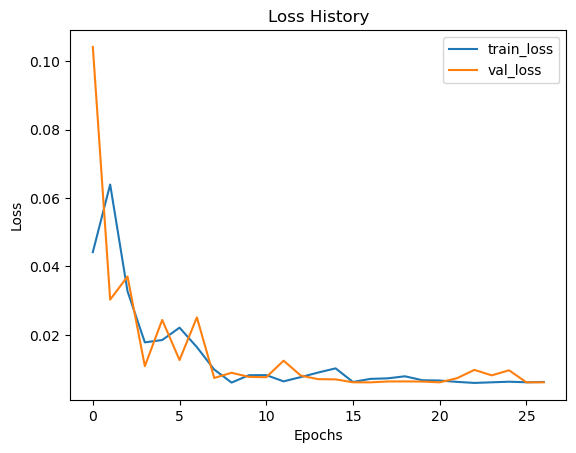

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

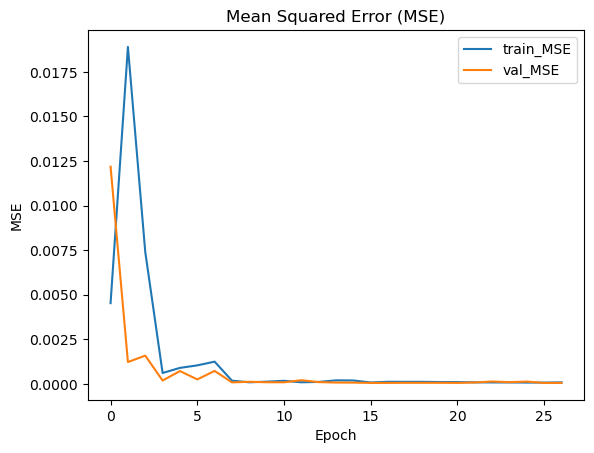

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

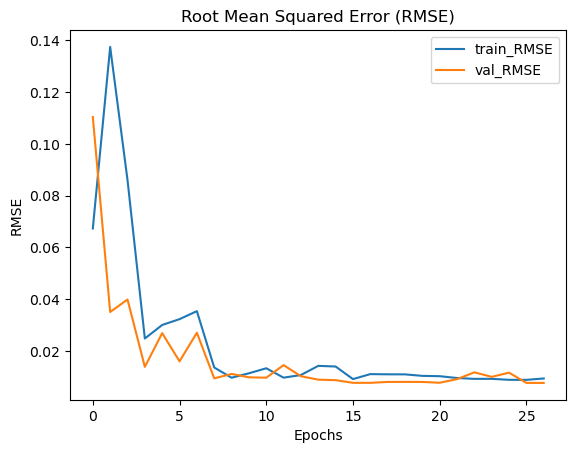

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

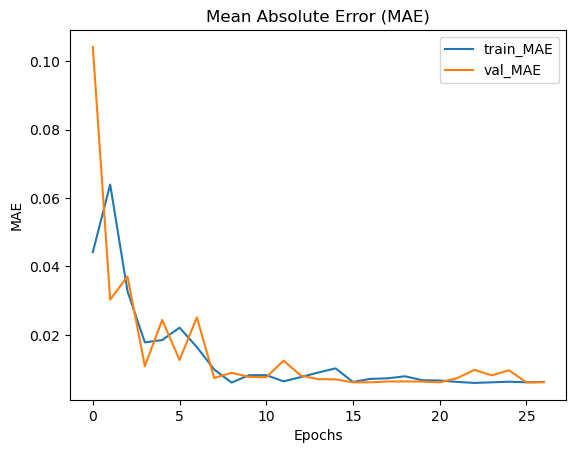

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

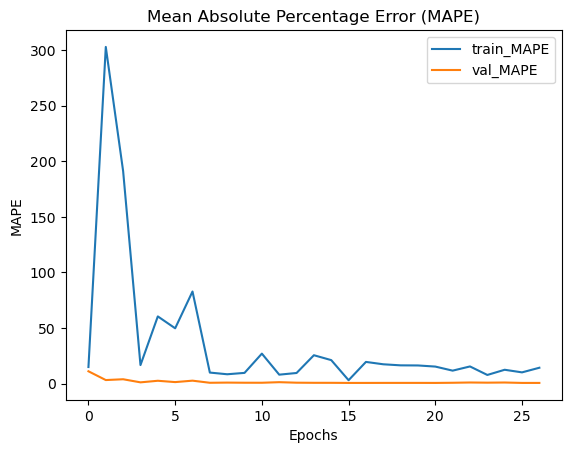

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:52:12.249449: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


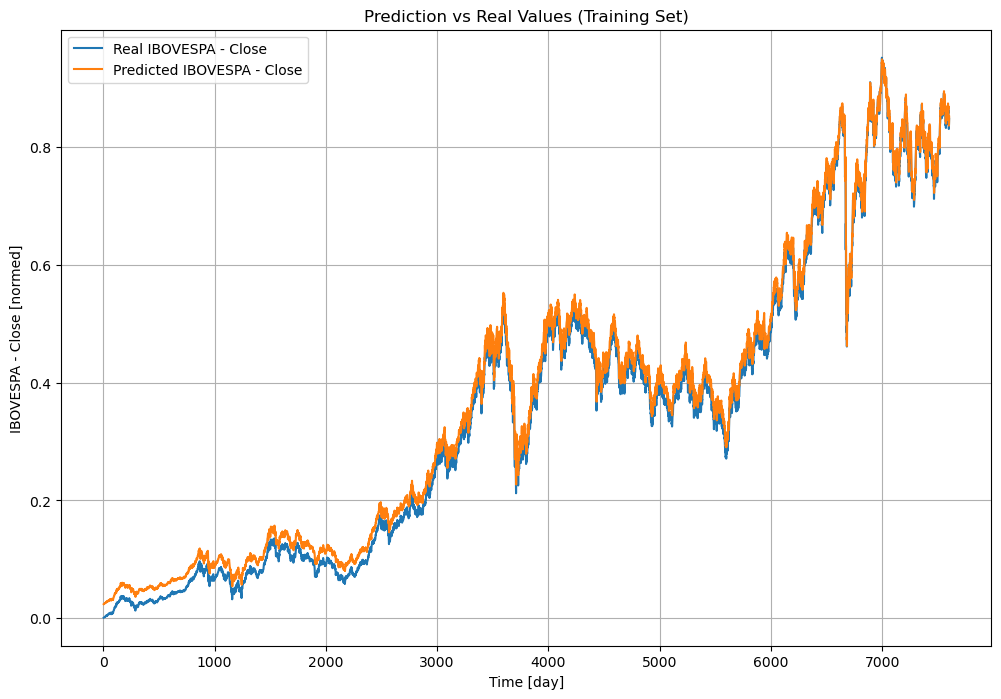

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


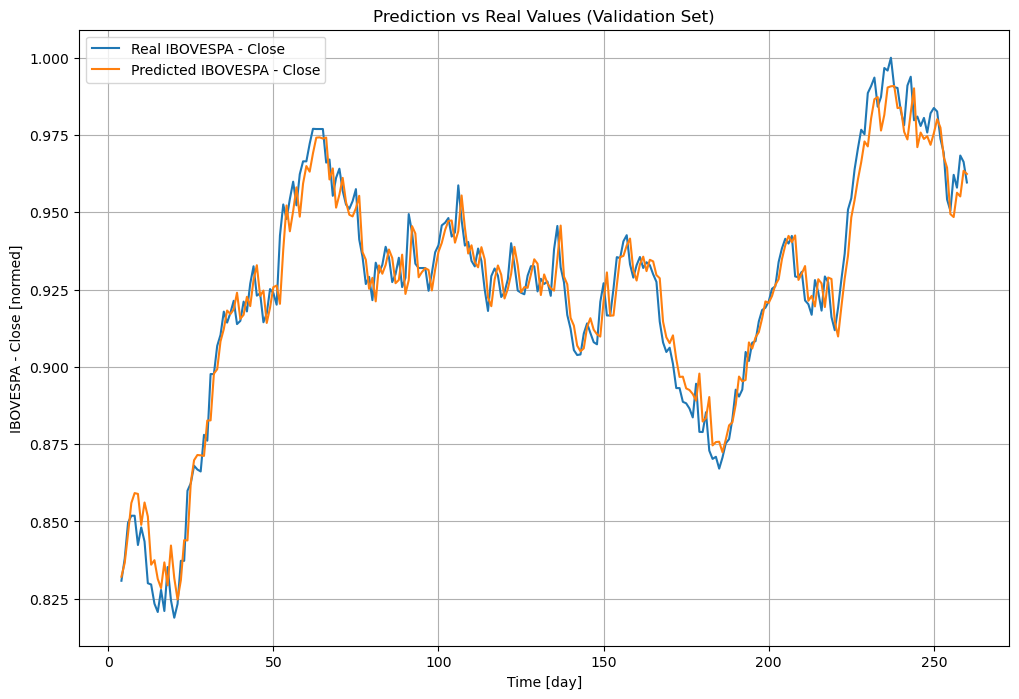

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


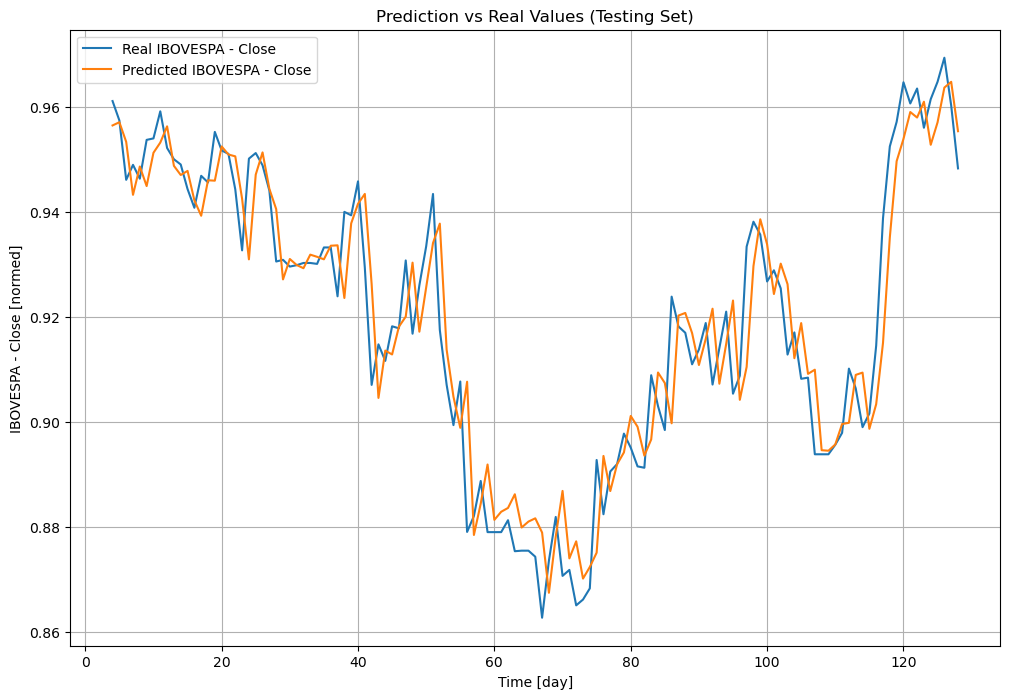

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

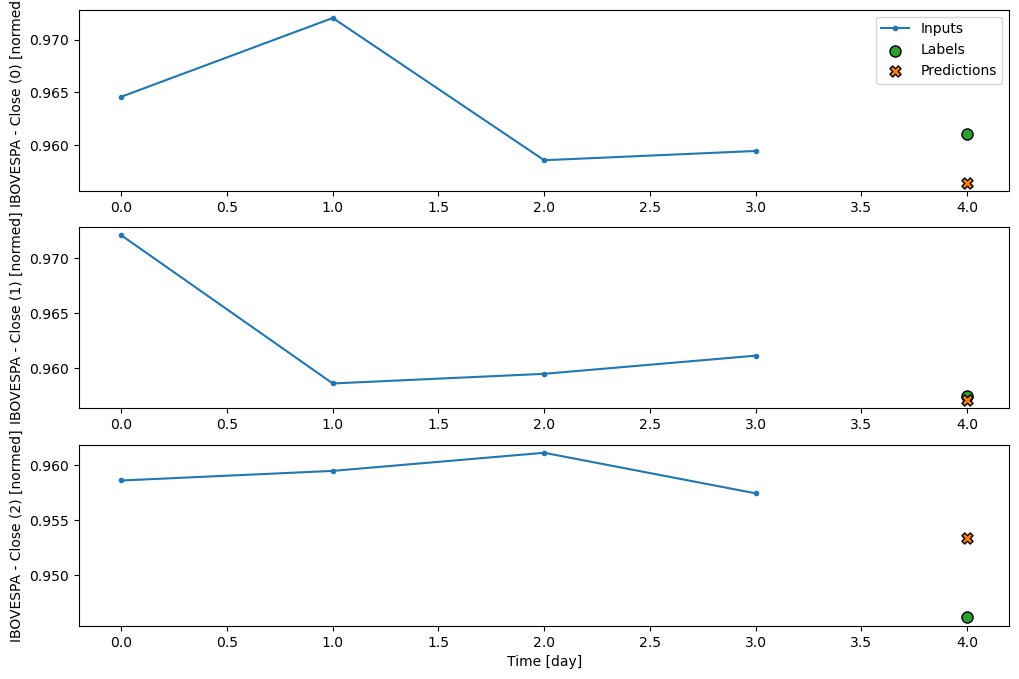

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:12s:97ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


array([[[0.9564662 , 0.9564662 , 0.9564662 , ..., 0.9564662 ,
         0.9564662 , 0.9564662 ]],

       [[0.9570792 , 0.9570792 , 0.9570792 , ..., 0.9570792 ,
         0.9570792 , 0.9570792 ]],

       [[0.95334435, 0.95334435, 0.95334435, ..., 0.95334435,
         0.95334435, 0.95334435]],

       ...,

       [[0.963681  , 0.963681  , 0.963681  , ..., 0.963681  ,
         0.963681  , 0.963681  ]],

       [[0.96477985, 0.96477985, 0.96477985, ..., 0.96477985,
         0.96477985, 0.96477985]],

       [[0.95536625, 0.95536625, 0.95536625, ..., 0.95536625,
         0.95536625, 0.95536625]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')